In [1]:
from keras import backend as K

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd

In [122]:
import keras

# Random Example

In [9]:
model = Sequential([
    Dense(100, input_shape=(2,), activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_data = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0]
])

# X AND Y
train_labels = keras.utils.to_categorical(np.array([
    1,
    0,
    0,
    1
]), num_classes=2)

model.summary()


NameError: name 'Sequential' is not defined

In [10]:
model.fit(train_data, train_labels, epochs=10, verbose=False)
model.evaluate(train_data, train_labels)

NameError: name 'model' is not defined

In [11]:
model.predict(train_data)

NameError: name 'model' is not defined

# Softmax Regression

## Try to Achieve This
`X and (Y OR Z)`

In [39]:
model = Sequential([
    Dense(500, input_shape=(3,), activation='sigmoid'),
    Dense(2, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
train_data = np.array([
    [1, 1, 1],
    [1, 1, 0],
    [1, 0, 1],
    [1, 0, 0],
    [0, 1, 1],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 0],
])

# X AND Y
train_labels = keras.utils.to_categorical(np.array([
    1,
    2,
    1,
    0,
    0,
    2,
    0,
    2
]), num_classes=3)

In [14]:
model.fit(train_data, train_labels, epochs=100, verbose=True)

NameError: name 'model' is not defined

# Indodax Data Retrieval

In [5]:
import requests
import datetime
import pytz
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [33]:
root_uri_trade_api = 'https://indodax.com/api'
root_uri_chart_api = 'https://indodax.com/tradingview/history'
#?symbol=BTCIDR&resolution=15&from=1546489788&to=1547785848'
chart_currency = 'BTCIDR'
period = '5'
time_begin = int(datetime.datetime(2018, 1, 1).timestamp())
time_end = int(datetime.datetime(2018, 6, 30).timestamp())
chart_query = '?symbol={}&resolution={}&from={}&to={}'.format(chart_currency, period, time_begin, time_end)

r = requests.get(root_uri_chart_api + chart_query)
price = pd.DataFrame({
    'open': r.json()['o'],
    'close': r.json()['c'],
    'high': r.json()['h'],
    'low': r.json()['l'],
    'volume': r.json()['v']
# }, index=list(map(lambda t: (datetime.datetime.utcfromtimestamp(t) + datetime.timedelta(hours=7)).strftime('%d/%m %H.%M'), r.json()['t'])))
}, index=list(map(lambda t: (datetime.datetime.utcfromtimestamp(t) + datetime.timedelta(hours=7)), r.json()['t'])))

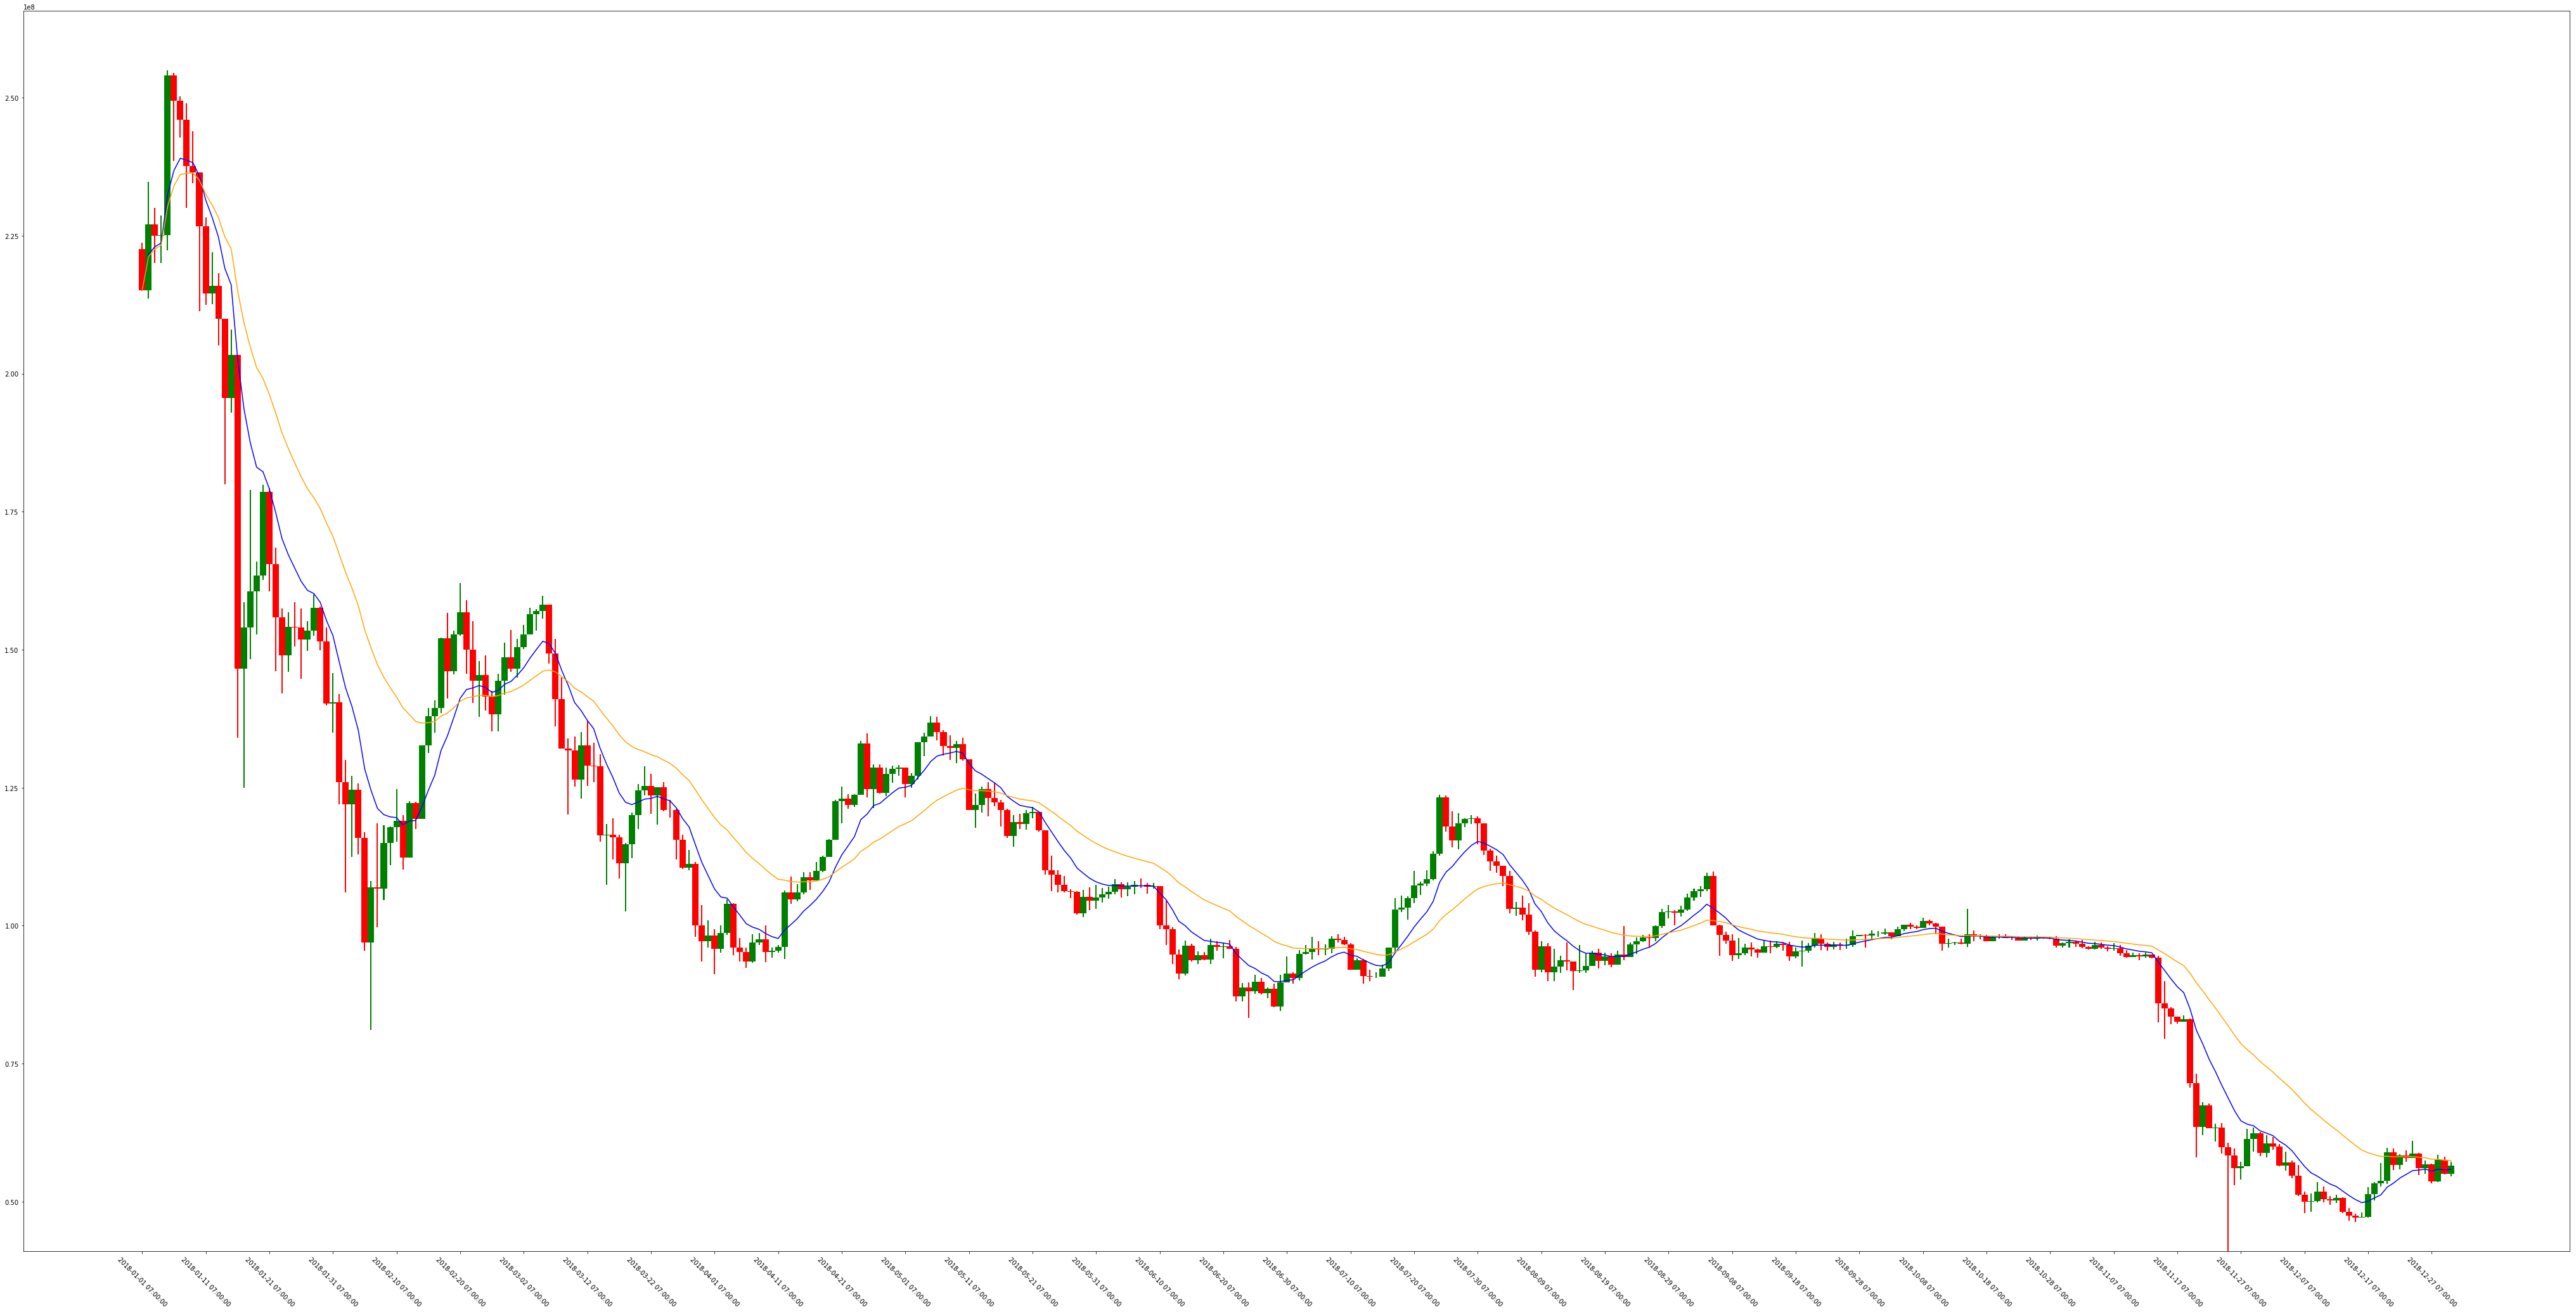

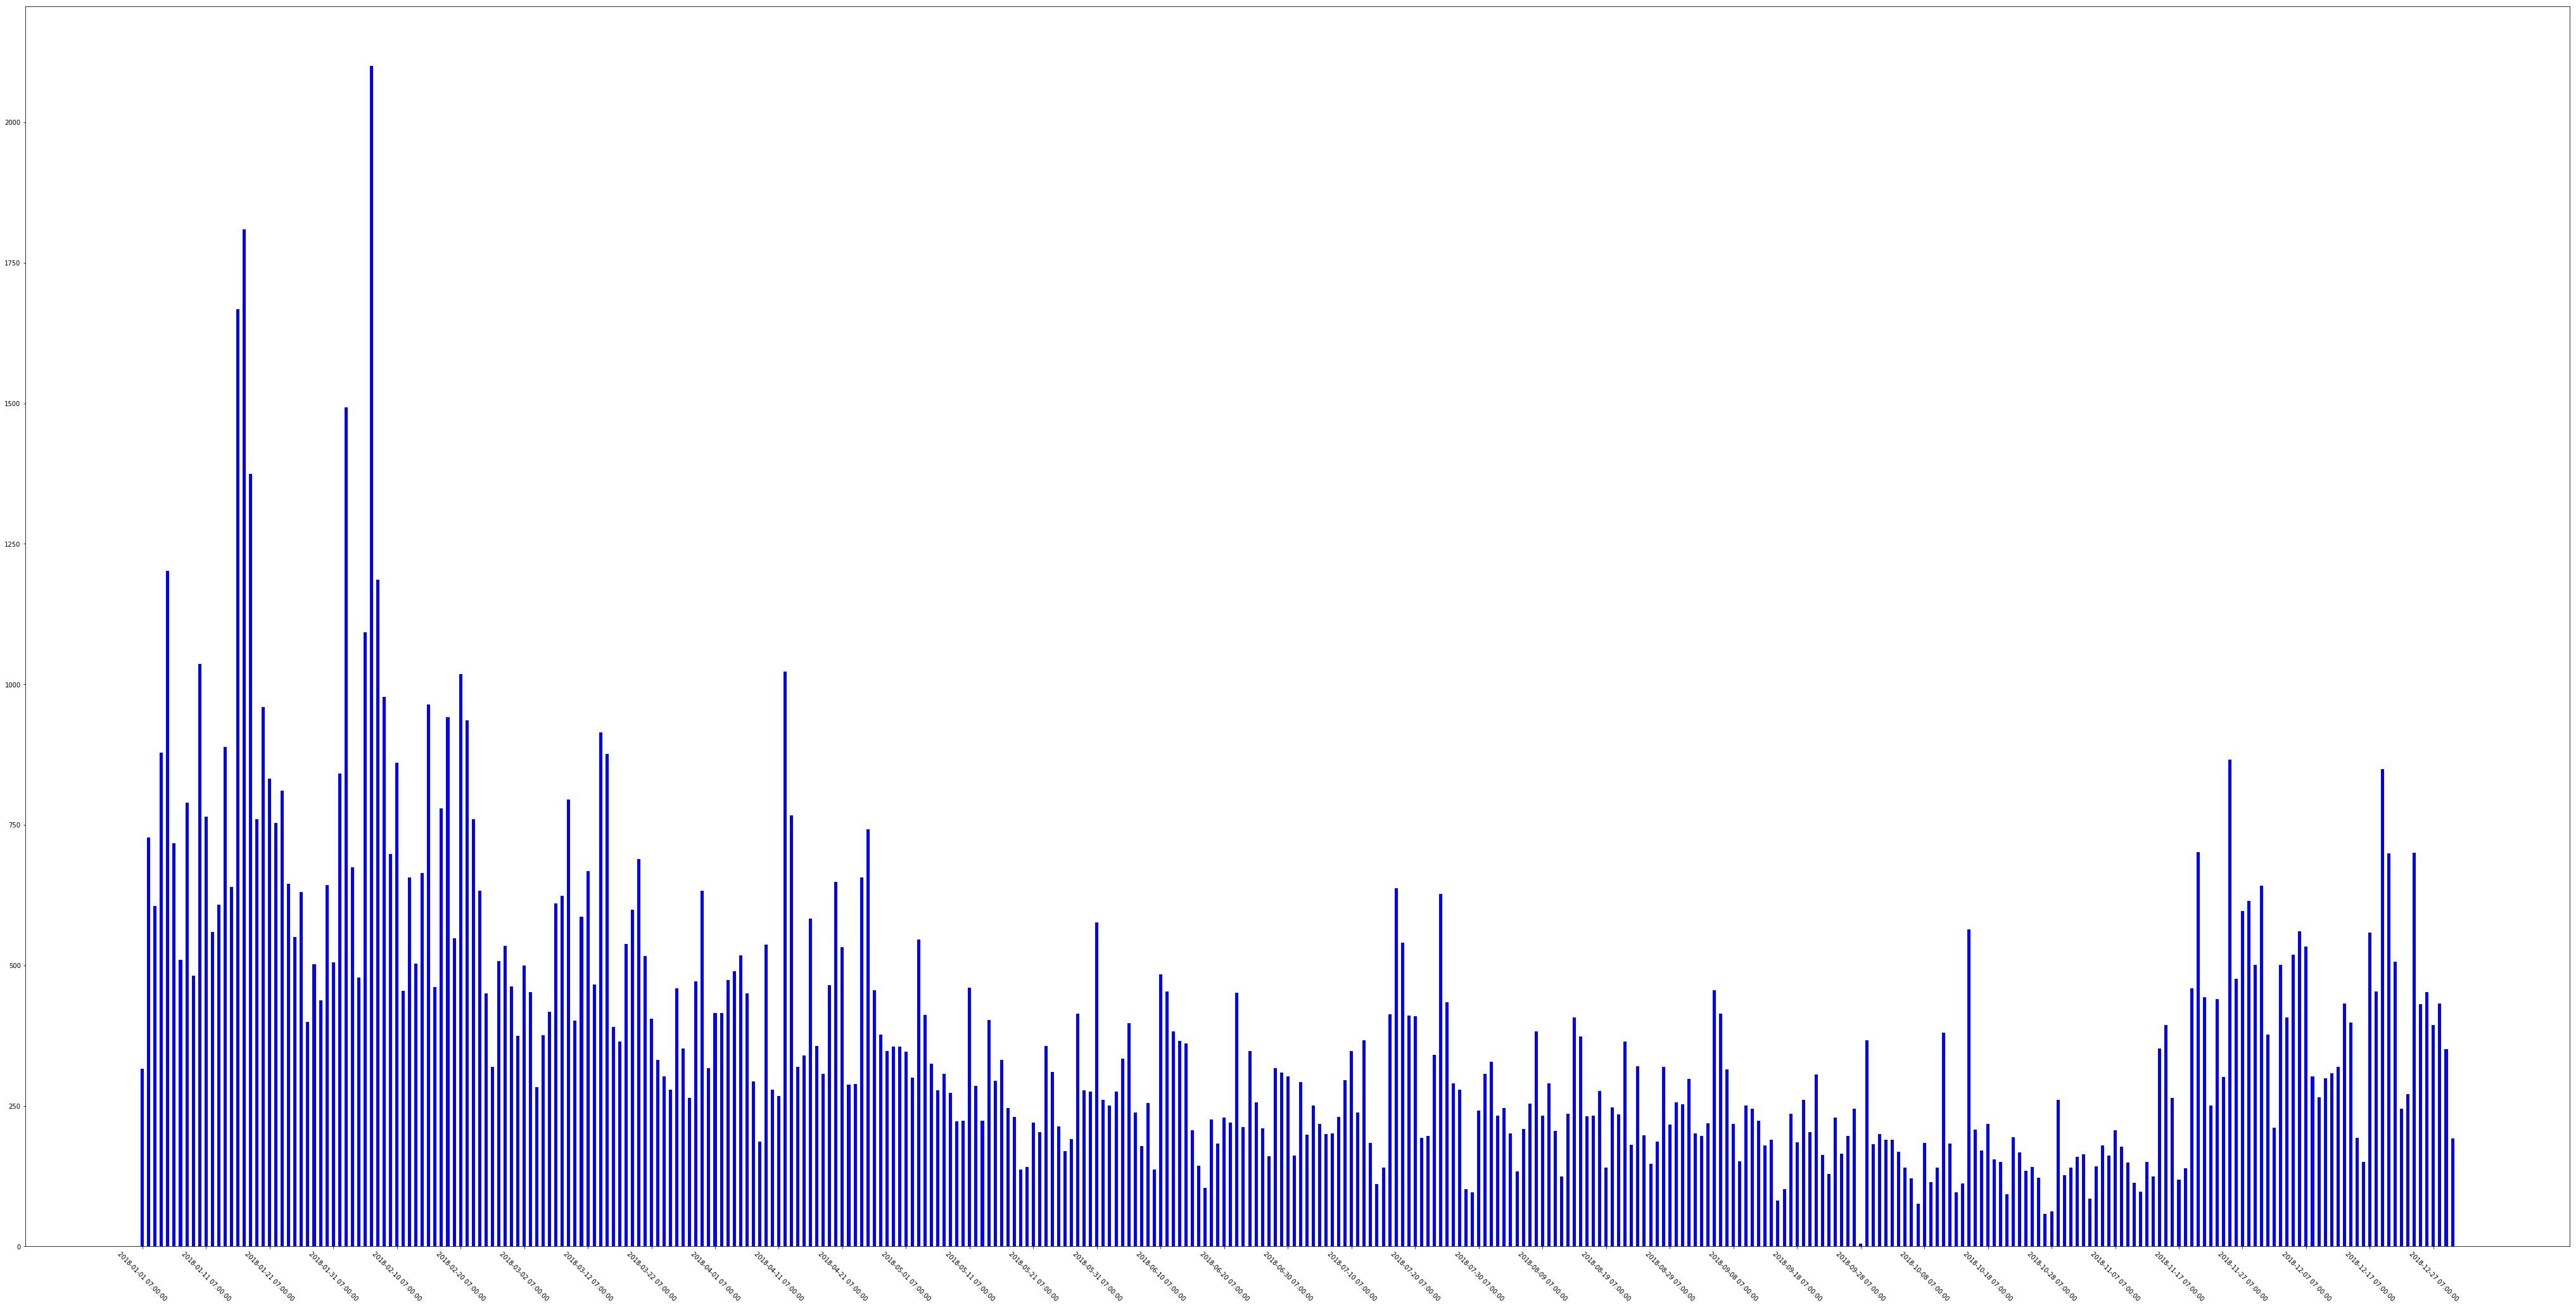

In [11]:
candle_color = lambda o, c: 'g' if c >= o else 'r'
fig_w = len(price.open)//5
fig_h = fig_w // 2
plt.figure(figsize=(fig_w, fig_h))
plt.bar( [i for i in range(len(price.open))],
        [abs(c-o) for c,o in zip(price.close, price.open)],
        [1 for i in range(len(price.open))],
        [min(c, o) for c,o in zip(price.close, price.open)],
        color=[candle_color(o, c) for c,o in zip(price.close, price.open)]
)
plt.bar( [i for i in range(len(price.high))],
        [h-l for h,l in zip(price.high, price.low)],
        [.2 for i in range(len(price.high))],
        [l for l in price.low],
        color=[candle_color(o, c) for c,o in zip(price.close, price.open)]
)
plt.plot([i for i in range(len(price.high))], price.close.ewm(span=10).mean(), color='blue')
plt.plot([i for i in range(len(price.high))], price.close.ewm(span=30).mean(), color='orange')
ax = plt.gca()
ax.set_xticks([i for i in range(len(price.index))][::10])
ax.set_xticklabels(price.index[::10], rotation=-45)
plt.figure(figsize=(fig_w, fig_h))
plt.bar([i for i in range(len(price.volume))],
        price.volume,
        .5,
        color='blue'
)
ax = plt.gca()
ax.set_xticks([i for i in range(len(price.index))][::10])
ax.set_xticklabels(price.index[::10], rotation=-45)

#use this to visualize
plt.show()

In [12]:
price

,open,close,high,low,volume
2018-01-01 07:00:00,222593000,215050000,223667000,215000000,315.482380
2018-01-02 07:00:00,215050000,227000000,234739000,213581000,727.694499
2018-01-03 07:00:00,227000000,225010000,229998000,220000000,605.351341
2018-01-04 07:00:00,225010000,225099000,228700000,220000000,877.976560
2018-01-05 07:00:00,225099000,253999000,255000000,222350000,1202.010540
2018-01-06 07:00:00,253999000,249399000,254442000,238500000,717.834347
2018-01-07 07:00:00,249399000,245980000,250199000,242755000,510.343462
2018-01-08 07:00:00,245980000,237575000,249000000,230000000,789.282746
2018-01-09 07:00:00,237575000,236489000,243950000,234518000,481.775120
2018-01-10 07:00:00,236489000,226740000,236492000,211366000,1036.515613


In [34]:
action_list = {}
action_list['\\'] = {'action'}
action_list['action'] = []

# weird workaround due to limitation to column name, see below
# HOLD --> 0
# BUY --> -1
# SELL --> 1
for i in range(len(price.index)-1):
    current = price.iloc[i]
    before = price.iloc[i-1]
    after = price.iloc[i+1]
    if current.close < after.close:
        if current.close > before.close:
            action_list['action'].append(0)
        else:
            action_list['action'].append(-1)
    elif current.close > after.close:
        if current.close < before.close:
            action_list['action'].append(0)
        else:
            action_list['action'].append(1)
    else:
        action_list['action'].append(0)
action_list['action'].append(0)
action_frame = pd.DataFrame(action_list['action']).set_index(price.index)

# we need the stock price somehow
action_frame = action_frame.join(price)

# column names change 'Action' to 'low'
# weird workaround due to limitation to column name
# reference : https://www.backtrader.com/docu/pandas-datafeed/pandas-datafeed.html?highlight=pandasdata
action_frame.columns = ['low', 'open', 'close', 'high', 'real_low', 'volume']

In [21]:
action_frame

,low,open,close,high,real_low,volume
2018-01-01 00:00:00,0,224501000,222697000,224503000,222673000,3.869549
2018-01-01 00:15:00,1,222697000,222899000,223083000,222697000,3.047817
2018-01-01 00:30:00,0,222899000,222867000,223083000,222000000,3.944302
2018-01-01 00:45:00,-1,222867000,222576000,223000000,222352000,1.937695
2018-01-01 01:00:00,1,222576000,224199000,224200000,222575000,1.799813
2018-01-01 01:15:00,0,224199000,223163000,224201000,222500000,1.677477
2018-01-01 01:30:00,-1,223163000,223025000,223490000,223025000,1.265841
2018-01-01 01:45:00,0,223025000,223026000,223026000,223025000,0.334693
2018-01-01 02:00:00,0,223026000,223999000,223999000,223025000,0.930138
2018-01-01 02:15:00,1,223999000,224722000,224810000,223751000,1.532012


In [15]:
import backtrader as bt
import backtrader.feeds as btfeeds

In [16]:
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # weird workaround due to limitation to column name
        # we take the low column as action
        self.data_action = self.datas[0].low
        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # buy!
            if self.data_action[0] == -1:
                self.log('BUY CREATE')
                self.order = self.buy()

        else:
            # sell!
            if self.data_action[0] == 1:
                self.log('SELL CREATE')
                self.order = self.sell()

In [31]:
# data_feed = btfeeds.PandasData(dataname=price, openinterest=None)
data_feed = btfeeds.PandasData(dataname=action_frame, openinterest=None)
#print(data_feed)

In [32]:
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)
cerebro.adddata(data_feed)
# cerebro.adddata(action_frame)
cerebro.broker.setcash(10000000000.0)

# Print out the starting conditions
startingPortofolio = cerebro.broker.getvalue()
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
cerebro.run()

# Print out the final result
finalPortofolio = cerebro.broker.getvalue()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
print('Profit: %.2f (%.6f%%)' % (finalPortofolio - startingPortofolio, (finalPortofolio - startingPortofolio)/startingPortofolio*100))

Starting Portfolio Value: 10000000000.00
2018-01-01, BUY CREATE
2018-01-01, BUY EXECUTED, 222697000.00
2018-01-01, SELL CREATE
2018-01-01, SELL EXECUTED, 223083000.00
2018-01-01, BUY CREATE
2018-01-01, BUY EXECUTED, 222000000.00
2018-01-01, SELL CREATE
2018-01-01, SELL EXECUTED, 222867000.00
2018-01-01, BUY CREATE
2018-01-01, BUY EXECUTED, 222486000.00
2018-01-01, SELL CREATE
2018-01-01, SELL EXECUTED, 224199000.00
2018-01-01, BUY CREATE
2018-01-01, BUY EXECUTED, 222569000.00
2018-01-01, SELL CREATE
2018-01-01, SELL EXECUTED, 223163000.00
2018-01-01, BUY CREATE
2018-01-01, BUY EXECUTED, 223025000.00
2018-01-01, SELL CREATE
2018-01-01, SELL EXECUTED, 223026000.00
2018-01-01, BUY CREATE
2018-01-01, BUY EXECUTED, 223025000.00
2018-01-01, SELL CREATE
2018-01-01, SELL EXECUTED, 224722000.00
2018-01-01, BUY CREATE
2018-01-01, BUY EXECUTED, 223506000.00
2018-01-01, SELL CREATE
2018-01-01, SELL EXECUTED, 223898000.00
2018-01-01, BUY CREATE
2018-01-01, BUY EXECUTED, 222106000.00
2018-01-01, SEL

2018-01-03, BUY CREATE
2018-01-03, BUY EXECUTED, 225349000.00
2018-01-03, SELL CREATE
2018-01-03, SELL EXECUTED, 228698000.00
2018-01-03, BUY CREATE
2018-01-03, BUY EXECUTED, 225298000.00
2018-01-03, SELL CREATE
2018-01-03, SELL EXECUTED, 226369000.00
2018-01-03, BUY CREATE
2018-01-03, BUY EXECUTED, 223752000.00
2018-01-03, SELL CREATE
2018-01-03, SELL EXECUTED, 225378000.00
2018-01-03, BUY CREATE
2018-01-03, BUY EXECUTED, 224605000.00
2018-01-03, SELL CREATE
2018-01-03, SELL EXECUTED, 224606000.00
2018-01-03, BUY CREATE
2018-01-03, BUY EXECUTED, 224601000.00
2018-01-03, SELL CREATE
2018-01-03, SELL EXECUTED, 224800000.00
2018-01-03, BUY CREATE
2018-01-03, BUY EXECUTED, 220314000.00
2018-01-03, SELL CREATE
2018-01-03, SELL EXECUTED, 221050000.00
2018-01-03, BUY CREATE
2018-01-03, BUY EXECUTED, 220655000.00
2018-01-03, SELL CREATE
2018-01-03, SELL EXECUTED, 220678000.00
2018-01-03, BUY CREATE
2018-01-03, BUY EXECUTED, 220675000.00
2018-01-03, SELL CREATE
2018-01-03, SELL EXECUTED, 22190

2018-01-05, BUY CREATE
2018-01-05, BUY EXECUTED, 227850000.00
2018-01-05, SELL CREATE
2018-01-05, SELL EXECUTED, 229498000.00
2018-01-05, BUY CREATE
2018-01-05, BUY EXECUTED, 227295000.00
2018-01-05, SELL CREATE
2018-01-05, SELL EXECUTED, 227996000.00
2018-01-05, BUY CREATE
2018-01-05, BUY EXECUTED, 227000000.00
2018-01-05, SELL CREATE
2018-01-05, SELL EXECUTED, 228600000.00
2018-01-05, BUY CREATE
2018-01-05, BUY EXECUTED, 227306000.00
2018-01-05, SELL CREATE
2018-01-05, SELL EXECUTED, 227313000.00
2018-01-05, BUY CREATE
2018-01-05, BUY EXECUTED, 226501000.00
2018-01-05, SELL CREATE
2018-01-05, SELL EXECUTED, 229433000.00
2018-01-05, BUY CREATE
2018-01-05, BUY EXECUTED, 227531000.00
2018-01-05, SELL CREATE
2018-01-05, SELL EXECUTED, 227547000.00
2018-01-05, BUY CREATE
2018-01-05, BUY EXECUTED, 227010000.00
2018-01-05, SELL CREATE
2018-01-05, SELL EXECUTED, 227557000.00
2018-01-05, BUY CREATE
2018-01-05, BUY EXECUTED, 227003000.00
2018-01-05, SELL CREATE
2018-01-05, SELL EXECUTED, 22765

2018-01-07, SELL CREATE
2018-01-07, SELL EXECUTED, 249401000.00
2018-01-07, BUY CREATE
2018-01-07, BUY EXECUTED, 249399000.00
2018-01-07, SELL CREATE
2018-01-07, SELL EXECUTED, 249500000.00
2018-01-07, BUY CREATE
2018-01-07, BUY EXECUTED, 249004000.00
2018-01-07, SELL CREATE
2018-01-07, SELL EXECUTED, 249089000.00
2018-01-07, BUY CREATE
2018-01-07, BUY EXECUTED, 247803000.00
2018-01-07, SELL CREATE
2018-01-07, SELL EXECUTED, 247997000.00
2018-01-07, BUY CREATE
2018-01-07, BUY EXECUTED, 247503000.00
2018-01-07, SELL CREATE
2018-01-07, SELL EXECUTED, 249887000.00
2018-01-07, BUY CREATE
2018-01-07, BUY EXECUTED, 249558000.00
2018-01-07, SELL CREATE
2018-01-07, SELL EXECUTED, 249896000.00
2018-01-07, BUY CREATE
2018-01-07, BUY EXECUTED, 249419000.00
2018-01-07, SELL CREATE
2018-01-07, SELL EXECUTED, 250100000.00
2018-01-07, BUY CREATE
2018-01-07, BUY EXECUTED, 249399000.00
2018-01-07, SELL CREATE
2018-01-07, SELL EXECUTED, 249850000.00
2018-01-07, BUY CREATE
2018-01-07, BUY EXECUTED, 24729

2018-01-09, BUY EXECUTED, 237538000.00
2018-01-09, SELL CREATE
2018-01-09, SELL EXECUTED, 238500000.00
2018-01-09, BUY CREATE
2018-01-09, BUY EXECUTED, 238499000.00
2018-01-09, SELL CREATE
2018-01-09, SELL EXECUTED, 239839000.00
2018-01-09, BUY CREATE
2018-01-09, BUY EXECUTED, 239611000.00
2018-01-09, SELL CREATE
2018-01-09, SELL EXECUTED, 239655000.00
2018-01-09, BUY CREATE
2018-01-09, BUY EXECUTED, 237575000.00
2018-01-09, SELL CREATE
2018-01-09, SELL EXECUTED, 238000000.00
2018-01-09, BUY CREATE
2018-01-09, BUY EXECUTED, 237501000.00
2018-01-09, SELL CREATE
2018-01-09, SELL EXECUTED, 237899000.00
2018-01-09, BUY CREATE
2018-01-09, BUY EXECUTED, 237499000.00
2018-01-09, SELL CREATE
2018-01-09, SELL EXECUTED, 239990000.00
2018-01-09, BUY CREATE
2018-01-09, BUY EXECUTED, 238321000.00
2018-01-09, SELL CREATE
2018-01-09, SELL EXECUTED, 239568000.00
2018-01-09, BUY CREATE
2018-01-09, BUY EXECUTED, 237349000.00
2018-01-09, SELL CREATE
2018-01-09, SELL EXECUTED, 238497000.00
2018-01-09, BUY

2018-01-11, SELL EXECUTED, 226994000.00
2018-01-11, BUY CREATE
2018-01-11, BUY EXECUTED, 226604000.00
2018-01-11, SELL CREATE
2018-01-11, SELL EXECUTED, 228337000.00
2018-01-11, BUY CREATE
2018-01-11, BUY EXECUTED, 228077000.00
2018-01-11, SELL CREATE
2018-01-11, SELL EXECUTED, 228326000.00
2018-01-11, BUY CREATE
2018-01-11, BUY EXECUTED, 227397000.00
2018-01-11, SELL CREATE
2018-01-11, SELL EXECUTED, 227699000.00
2018-01-11, BUY CREATE
2018-01-11, BUY EXECUTED, 221100000.00
2018-01-11, SELL CREATE
2018-01-11, SELL EXECUTED, 222798000.00
2018-01-11, BUY CREATE
2018-01-11, BUY EXECUTED, 222499000.00
2018-01-11, SELL CREATE
2018-01-11, SELL EXECUTED, 223997000.00
2018-01-11, BUY CREATE
2018-01-11, BUY EXECUTED, 221101000.00
2018-01-11, SELL CREATE
2018-01-11, SELL EXECUTED, 222000000.00
2018-01-11, BUY CREATE
2018-01-11, BUY EXECUTED, 212601000.00
2018-01-11, SELL CREATE
2018-01-11, SELL EXECUTED, 219502000.00
2018-01-11, BUY CREATE
2018-01-11, BUY EXECUTED, 217500000.00
2018-01-11, SELL

2018-01-13, SELL EXECUTED, 217241000.00
2018-01-13, BUY CREATE
2018-01-13, BUY EXECUTED, 217200000.00
2018-01-13, SELL CREATE
2018-01-13, SELL EXECUTED, 217669000.00
2018-01-13, BUY CREATE
2018-01-13, BUY EXECUTED, 216503000.00
2018-01-13, SELL CREATE
2018-01-13, SELL EXECUTED, 216999000.00
2018-01-13, BUY CREATE
2018-01-13, BUY EXECUTED, 216571000.00
2018-01-13, SELL CREATE
2018-01-13, SELL EXECUTED, 216998000.00
2018-01-13, BUY CREATE
2018-01-13, BUY EXECUTED, 216985000.00
2018-01-13, SELL CREATE
2018-01-13, SELL EXECUTED, 217297000.00
2018-01-13, BUY CREATE
2018-01-13, BUY EXECUTED, 217007000.00
2018-01-13, SELL CREATE
2018-01-13, SELL EXECUTED, 217053000.00
2018-01-13, BUY CREATE
2018-01-13, BUY EXECUTED, 216505000.00
2018-01-13, SELL CREATE
2018-01-13, SELL EXECUTED, 216752000.00
2018-01-13, BUY CREATE
2018-01-13, BUY EXECUTED, 216250000.00
2018-01-13, SELL CREATE
2018-01-13, SELL EXECUTED, 216601000.00
2018-01-13, BUY CREATE
2018-01-13, BUY EXECUTED, 216489000.00
2018-01-13, SELL

2018-01-15, BUY CREATE
2018-01-15, BUY EXECUTED, 203582000.00
2018-01-15, SELL CREATE
2018-01-15, SELL EXECUTED, 204999000.00
2018-01-15, BUY CREATE
2018-01-15, BUY EXECUTED, 204995000.00
2018-01-15, SELL CREATE
2018-01-15, SELL EXECUTED, 205000000.00
2018-01-15, BUY CREATE
2018-01-15, BUY EXECUTED, 201805000.00
2018-01-15, SELL CREATE
2018-01-15, SELL EXECUTED, 202900000.00
2018-01-15, BUY CREATE
2018-01-15, BUY EXECUTED, 202566000.00
2018-01-15, SELL CREATE
2018-01-15, SELL EXECUTED, 203499000.00
2018-01-15, BUY CREATE
2018-01-15, BUY EXECUTED, 200499000.00
2018-01-15, SELL CREATE
2018-01-15, SELL EXECUTED, 200999000.00
2018-01-15, BUY CREATE
2018-01-15, BUY EXECUTED, 198601000.00
2018-01-15, SELL CREATE
2018-01-15, SELL EXECUTED, 202497000.00
2018-01-15, BUY CREATE
2018-01-15, BUY EXECUTED, 202495000.00
2018-01-15, SELL CREATE
2018-01-15, SELL EXECUTED, 204318000.00
2018-01-15, BUY CREATE
2018-01-15, BUY EXECUTED, 202703000.00
2018-01-15, SELL CREATE
2018-01-15, SELL EXECUTED, 20444

2018-01-18, SELL EXECUTED, 164000000.00
2018-01-18, BUY CREATE
2018-01-18, BUY EXECUTED, 162559000.00
2018-01-18, SELL CREATE
2018-01-18, SELL EXECUTED, 164004000.00
2018-01-18, BUY CREATE
2018-01-18, BUY EXECUTED, 162708000.00
2018-01-18, SELL CREATE
2018-01-18, SELL EXECUTED, 164000000.00
2018-01-18, BUY CREATE
2018-01-18, BUY EXECUTED, 162558000.00
2018-01-18, SELL CREATE
2018-01-18, SELL EXECUTED, 165555000.00
2018-01-18, BUY CREATE
2018-01-18, BUY EXECUTED, 165324000.00
2018-01-18, SELL CREATE
2018-01-18, SELL EXECUTED, 168932000.00
2018-01-18, BUY CREATE
2018-01-18, BUY EXECUTED, 166396000.00
2018-01-18, SELL CREATE
2018-01-18, SELL EXECUTED, 167786000.00
2018-01-18, BUY CREATE
2018-01-18, BUY EXECUTED, 165501000.00
2018-01-18, SELL CREATE
2018-01-18, SELL EXECUTED, 166123000.00
2018-01-18, BUY CREATE
2018-01-18, BUY EXECUTED, 164001000.00
2018-01-18, SELL CREATE
2018-01-18, SELL EXECUTED, 164798000.00
2018-01-18, BUY CREATE
2018-01-18, BUY EXECUTED, 163650000.00
2018-01-18, SELL

2018-01-22, SELL EXECUTED, 167423000.00
2018-01-22, BUY CREATE
2018-01-22, BUY EXECUTED, 165987000.00
2018-01-22, SELL CREATE
2018-01-22, SELL EXECUTED, 166790000.00
2018-01-22, BUY CREATE
2018-01-22, BUY EXECUTED, 163400000.00
2018-01-22, SELL CREATE
2018-01-22, SELL EXECUTED, 164193000.00
2018-01-22, BUY CREATE
2018-01-22, BUY EXECUTED, 162050000.00
2018-01-22, SELL CREATE
2018-01-22, SELL EXECUTED, 163342000.00
2018-01-22, BUY CREATE
2018-01-22, BUY EXECUTED, 162486000.00
2018-01-22, SELL CREATE
2018-01-22, SELL EXECUTED, 165449000.00
2018-01-22, BUY CREATE
2018-01-22, BUY EXECUTED, 165201000.00
2018-01-22, SELL CREATE
2018-01-22, SELL EXECUTED, 165997000.00
2018-01-22, BUY CREATE
2018-01-22, BUY EXECUTED, 165694000.00
2018-01-22, SELL CREATE
2018-01-22, SELL EXECUTED, 165896000.00
2018-01-22, BUY CREATE
2018-01-22, BUY EXECUTED, 165001000.00
2018-01-22, SELL CREATE
2018-01-22, SELL EXECUTED, 165799000.00
2018-01-22, BUY CREATE
2018-01-22, BUY EXECUTED, 165243000.00
2018-01-22, SELL

2018-01-25, SELL CREATE
2018-01-25, SELL EXECUTED, 151512000.00
2018-01-25, BUY CREATE
2018-01-25, BUY EXECUTED, 151020000.00
2018-01-25, SELL CREATE
2018-01-25, SELL EXECUTED, 151050000.00
2018-01-25, BUY CREATE
2018-01-25, BUY EXECUTED, 150288000.00
2018-01-25, SELL CREATE
2018-01-25, SELL EXECUTED, 150900000.00
2018-01-25, BUY CREATE
2018-01-25, BUY EXECUTED, 150256000.00
2018-01-25, SELL CREATE
2018-01-25, SELL EXECUTED, 151366000.00
2018-01-25, BUY CREATE
2018-01-25, BUY EXECUTED, 150676000.00
2018-01-25, SELL CREATE
2018-01-25, SELL EXECUTED, 151666000.00
2018-01-25, BUY CREATE
2018-01-25, BUY EXECUTED, 151329000.00
2018-01-25, SELL CREATE
2018-01-25, SELL EXECUTED, 152001000.00
2018-01-25, BUY CREATE
2018-01-25, BUY EXECUTED, 151700000.00
2018-01-25, SELL CREATE
2018-01-25, SELL EXECUTED, 152499000.00
2018-01-25, BUY CREATE
2018-01-25, BUY EXECUTED, 152498000.00
2018-01-25, SELL CREATE
2018-01-25, SELL EXECUTED, 152499000.00
2018-01-25, BUY CREATE
2018-01-25, BUY EXECUTED, 15206

2018-01-27, SELL CREATE
2018-01-27, SELL EXECUTED, 152796000.00
2018-01-27, BUY CREATE
2018-01-27, BUY EXECUTED, 152699000.00
2018-01-27, SELL CREATE
2018-01-27, SELL EXECUTED, 152722000.00
2018-01-27, BUY CREATE
2018-01-27, BUY EXECUTED, 151289000.00
2018-01-27, SELL CREATE
2018-01-27, SELL EXECUTED, 152723000.00
2018-01-27, BUY CREATE
2018-01-27, BUY EXECUTED, 152653000.00
2018-01-27, SELL CREATE
2018-01-27, SELL EXECUTED, 153594000.00
2018-01-27, BUY CREATE
2018-01-27, BUY EXECUTED, 152904000.00
2018-01-27, SELL CREATE
2018-01-27, SELL EXECUTED, 153097000.00
2018-01-27, BUY CREATE
2018-01-27, BUY EXECUTED, 152920000.00
2018-01-27, SELL CREATE
2018-01-27, SELL EXECUTED, 152999000.00
2018-01-27, BUY CREATE
2018-01-27, BUY EXECUTED, 152997000.00
2018-01-27, SELL CREATE
2018-01-27, SELL EXECUTED, 152998000.00
2018-01-27, BUY CREATE
2018-01-27, BUY EXECUTED, 150270000.00
2018-01-27, SELL CREATE
2018-01-27, SELL EXECUTED, 150305000.00
2018-01-27, BUY CREATE
2018-01-27, BUY EXECUTED, 14980

2018-01-29, BUY CREATE
2018-01-29, BUY EXECUTED, 151592000.00
2018-01-29, SELL CREATE
2018-01-29, SELL EXECUTED, 152400000.00
2018-01-29, BUY CREATE
2018-01-29, BUY EXECUTED, 152203000.00
2018-01-29, SELL CREATE
2018-01-29, SELL EXECUTED, 152302000.00
2018-01-29, BUY CREATE
2018-01-29, BUY EXECUTED, 152014000.00
2018-01-29, SELL CREATE
2018-01-29, SELL EXECUTED, 153700000.00
2018-01-29, BUY CREATE
2018-01-29, BUY EXECUTED, 153677000.00
2018-01-29, SELL CREATE
2018-01-29, SELL EXECUTED, 154722000.00
2018-01-29, BUY CREATE
2018-01-29, BUY EXECUTED, 153661000.00
2018-01-29, SELL CREATE
2018-01-29, SELL EXECUTED, 154190000.00
2018-01-29, BUY CREATE
2018-01-29, BUY EXECUTED, 153008000.00
2018-01-29, SELL CREATE
2018-01-29, SELL EXECUTED, 153194000.00
2018-01-29, BUY CREATE
2018-01-29, BUY EXECUTED, 152640000.00
2018-01-29, SELL CREATE
2018-01-29, SELL EXECUTED, 153179000.00
2018-01-29, BUY CREATE
2018-01-29, BUY EXECUTED, 152999000.00
2018-01-29, SELL CREATE
2018-01-29, SELL EXECUTED, 15319

2018-02-01, BUY CREATE
2018-02-01, BUY EXECUTED, 141000000.00
2018-02-01, SELL CREATE
2018-02-01, SELL EXECUTED, 141248000.00
2018-02-01, BUY CREATE
2018-02-01, BUY EXECUTED, 141247000.00
2018-02-01, SELL CREATE
2018-02-01, SELL EXECUTED, 141899000.00
2018-02-01, BUY CREATE
2018-02-01, BUY EXECUTED, 141410000.00
2018-02-01, SELL CREATE
2018-02-01, SELL EXECUTED, 141480000.00
2018-02-01, BUY CREATE
2018-02-01, BUY EXECUTED, 141100000.00
2018-02-01, SELL CREATE
2018-02-01, SELL EXECUTED, 141350000.00
2018-02-01, BUY CREATE
2018-02-01, BUY EXECUTED, 140125000.00
2018-02-01, SELL CREATE
2018-02-01, SELL EXECUTED, 140143000.00
2018-02-01, BUY CREATE
2018-02-01, BUY EXECUTED, 140006000.00
2018-02-01, SELL CREATE
2018-02-01, SELL EXECUTED, 140091000.00
2018-02-01, BUY CREATE
2018-02-01, BUY EXECUTED, 138602000.00
2018-02-01, SELL CREATE
2018-02-01, SELL EXECUTED, 139835000.00
2018-02-01, BUY CREATE
2018-02-01, BUY EXECUTED, 138409000.00
2018-02-01, SELL CREATE
2018-02-01, SELL EXECUTED, 13860

2018-02-03, SELL EXECUTED, 126500000.00
2018-02-03, BUY CREATE
2018-02-03, BUY EXECUTED, 125731000.00
2018-02-03, SELL CREATE
2018-02-03, SELL EXECUTED, 126001000.00
2018-02-03, BUY CREATE
2018-02-03, BUY EXECUTED, 126000000.00
2018-02-03, SELL CREATE
2018-02-03, SELL EXECUTED, 127005000.00
2018-02-03, BUY CREATE
2018-02-03, BUY EXECUTED, 124005000.00
2018-02-03, SELL CREATE
2018-02-03, SELL EXECUTED, 125069000.00
2018-02-03, BUY CREATE
2018-02-03, BUY EXECUTED, 125016000.00
2018-02-03, SELL CREATE
2018-02-03, SELL EXECUTED, 125182000.00
2018-02-03, BUY CREATE
2018-02-03, BUY EXECUTED, 123499000.00
2018-02-03, SELL CREATE
2018-02-03, SELL EXECUTED, 124444000.00
2018-02-03, BUY CREATE
2018-02-03, BUY EXECUTED, 122017000.00
2018-02-03, SELL CREATE
2018-02-03, SELL EXECUTED, 124421000.00
2018-02-03, BUY CREATE
2018-02-03, BUY EXECUTED, 123360000.00
2018-02-04, SELL CREATE
2018-02-04, SELL EXECUTED, 125126000.00
2018-02-04, BUY CREATE
2018-02-04, BUY EXECUTED, 124480000.00
2018-02-04, SELL

2018-02-07, BUY EXECUTED, 99672000.00
2018-02-07, SELL CREATE
2018-02-07, SELL EXECUTED, 103101000.00
2018-02-07, BUY CREATE
2018-02-07, BUY EXECUTED, 102503000.00
2018-02-07, SELL CREATE
2018-02-07, SELL EXECUTED, 105000000.00
2018-02-07, BUY CREATE
2018-02-07, BUY EXECUTED, 103520000.00
2018-02-07, SELL CREATE
2018-02-07, SELL EXECUTED, 104450000.00
2018-02-07, BUY CREATE
2018-02-07, BUY EXECUTED, 102901000.00
2018-02-07, SELL CREATE
2018-02-07, SELL EXECUTED, 103191000.00
2018-02-07, BUY CREATE
2018-02-07, BUY EXECUTED, 102027000.00
2018-02-07, SELL CREATE
2018-02-07, SELL EXECUTED, 102597000.00
2018-02-07, BUY CREATE
2018-02-07, BUY EXECUTED, 101975000.00
2018-02-07, SELL CREATE
2018-02-07, SELL EXECUTED, 103011000.00
2018-02-07, BUY CREATE
2018-02-07, BUY EXECUTED, 102744000.00
2018-02-07, SELL CREATE
2018-02-07, SELL EXECUTED, 103524000.00
2018-02-07, BUY CREATE
2018-02-07, BUY EXECUTED, 103102000.00
2018-02-07, SELL CREATE
2018-02-07, SELL EXECUTED, 103712000.00
2018-02-07, BUY 

2018-02-09, SELL EXECUTED, 115250000.00
2018-02-09, BUY CREATE
2018-02-09, BUY EXECUTED, 114800000.00
2018-02-09, SELL CREATE
2018-02-09, SELL EXECUTED, 114806000.00
2018-02-09, BUY CREATE
2018-02-09, BUY EXECUTED, 113988000.00
2018-02-09, SELL CREATE
2018-02-09, SELL EXECUTED, 114399000.00
2018-02-09, BUY CREATE
2018-02-09, BUY EXECUTED, 113814000.00
2018-02-09, SELL CREATE
2018-02-09, SELL EXECUTED, 114441000.00
2018-02-09, BUY CREATE
2018-02-09, BUY EXECUTED, 114410000.00
2018-02-09, SELL CREATE
2018-02-09, SELL EXECUTED, 114589000.00
2018-02-09, BUY CREATE
2018-02-09, BUY EXECUTED, 114100000.00
2018-02-09, SELL CREATE
2018-02-09, SELL EXECUTED, 115600000.00
2018-02-09, BUY CREATE
2018-02-09, BUY EXECUTED, 115010000.00
2018-02-09, SELL CREATE
2018-02-09, SELL EXECUTED, 116459000.00
2018-02-09, BUY CREATE
2018-02-09, BUY EXECUTED, 115425000.00
2018-02-09, SELL CREATE
2018-02-09, SELL EXECUTED, 115744000.00
2018-02-09, BUY CREATE
2018-02-09, BUY EXECUTED, 114783000.00
2018-02-09, SELL

2018-02-12, SELL CREATE
2018-02-12, SELL EXECUTED, 117400000.00
2018-02-12, BUY CREATE
2018-02-12, BUY EXECUTED, 116809000.00
2018-02-12, SELL CREATE
2018-02-12, SELL EXECUTED, 117000000.00
2018-02-12, BUY CREATE
2018-02-12, BUY EXECUTED, 116811000.00
2018-02-12, SELL CREATE
2018-02-12, SELL EXECUTED, 116934000.00
2018-02-12, BUY CREATE
2018-02-12, BUY EXECUTED, 116823000.00
2018-02-12, SELL CREATE
2018-02-12, SELL EXECUTED, 116994000.00
2018-02-12, BUY CREATE
2018-02-12, BUY EXECUTED, 116851000.00
2018-02-12, SELL CREATE
2018-02-12, SELL EXECUTED, 116999000.00
2018-02-12, BUY CREATE
2018-02-12, BUY EXECUTED, 115306000.00
2018-02-12, SELL CREATE
2018-02-12, SELL EXECUTED, 115900000.00
2018-02-12, BUY CREATE
2018-02-12, BUY EXECUTED, 115593000.00
2018-02-12, SELL CREATE
2018-02-12, SELL EXECUTED, 116652000.00
2018-02-12, BUY CREATE
2018-02-12, BUY EXECUTED, 116002000.00
2018-02-12, SELL CREATE
2018-02-12, SELL EXECUTED, 118400000.00
2018-02-12, BUY CREATE
2018-02-12, BUY EXECUTED, 11765

2018-02-14, SELL CREATE
2018-02-14, SELL EXECUTED, 123888000.00
2018-02-14, BUY CREATE
2018-02-14, BUY EXECUTED, 123511000.00
2018-02-14, SELL CREATE
2018-02-14, SELL EXECUTED, 124000000.00
2018-02-14, BUY CREATE
2018-02-14, BUY EXECUTED, 123406000.00
2018-02-14, SELL CREATE
2018-02-14, SELL EXECUTED, 123780000.00
2018-02-14, BUY CREATE
2018-02-14, BUY EXECUTED, 123707000.00
2018-02-14, SELL CREATE
2018-02-14, SELL EXECUTED, 123821000.00
2018-02-14, BUY CREATE
2018-02-14, BUY EXECUTED, 123230000.00
2018-02-14, SELL CREATE
2018-02-14, SELL EXECUTED, 123292000.00
2018-02-14, BUY CREATE
2018-02-14, BUY EXECUTED, 122046000.00
2018-02-14, SELL CREATE
2018-02-14, SELL EXECUTED, 123003000.00
2018-02-14, BUY CREATE
2018-02-14, BUY EXECUTED, 122635000.00
2018-02-14, SELL CREATE
2018-02-14, SELL EXECUTED, 123800000.00
2018-02-14, BUY CREATE
2018-02-14, BUY EXECUTED, 122751000.00
2018-02-14, SELL CREATE
2018-02-14, SELL EXECUTED, 123000000.00
2018-02-14, BUY CREATE
2018-02-14, BUY EXECUTED, 12272

2018-02-17, SELL CREATE
2018-02-17, SELL EXECUTED, 139839000.00
2018-02-17, BUY CREATE
2018-02-17, BUY EXECUTED, 139610000.00
2018-02-17, SELL CREATE
2018-02-17, SELL EXECUTED, 141499000.00
2018-02-17, BUY CREATE
2018-02-17, BUY EXECUTED, 141000000.00
2018-02-17, SELL CREATE
2018-02-17, SELL EXECUTED, 142241000.00
2018-02-17, BUY CREATE
2018-02-17, BUY EXECUTED, 142120000.00
2018-02-17, SELL CREATE
2018-02-17, SELL EXECUTED, 143800000.00
2018-02-17, BUY CREATE
2018-02-17, BUY EXECUTED, 143016000.00
2018-02-17, SELL CREATE
2018-02-17, SELL EXECUTED, 143399000.00
2018-02-17, BUY CREATE
2018-02-17, BUY EXECUTED, 142361000.00
2018-02-17, SELL CREATE
2018-02-17, SELL EXECUTED, 143599000.00
2018-02-17, BUY CREATE
2018-02-17, BUY EXECUTED, 143199000.00
2018-02-17, SELL CREATE
2018-02-17, SELL EXECUTED, 143205000.00
2018-02-17, BUY CREATE
2018-02-17, BUY EXECUTED, 143200000.00
2018-02-17, SELL CREATE
2018-02-17, SELL EXECUTED, 143735000.00
2018-02-17, BUY CREATE
2018-02-17, BUY EXECUTED, 14339

2018-02-19, BUY EXECUTED, 149219000.00
2018-02-19, SELL CREATE
2018-02-19, SELL EXECUTED, 149384000.00
2018-02-19, BUY CREATE
2018-02-19, BUY EXECUTED, 148372000.00
2018-02-19, SELL CREATE
2018-02-19, SELL EXECUTED, 149019000.00
2018-02-19, BUY CREATE
2018-02-19, BUY EXECUTED, 148996000.00
2018-02-19, SELL CREATE
2018-02-19, SELL EXECUTED, 149602000.00
2018-02-19, BUY CREATE
2018-02-19, BUY EXECUTED, 149497000.00
2018-02-19, SELL CREATE
2018-02-19, SELL EXECUTED, 149688000.00
2018-02-19, BUY CREATE
2018-02-19, BUY EXECUTED, 148705000.00
2018-02-19, SELL CREATE
2018-02-19, SELL EXECUTED, 148786000.00
2018-02-19, BUY CREATE
2018-02-19, BUY EXECUTED, 148785000.00
2018-02-19, SELL CREATE
2018-02-19, SELL EXECUTED, 149199000.00
2018-02-19, BUY CREATE
2018-02-19, BUY EXECUTED, 149100000.00
2018-02-19, SELL CREATE
2018-02-19, SELL EXECUTED, 150800000.00
2018-02-19, BUY CREATE
2018-02-19, BUY EXECUTED, 150700000.00
2018-02-19, SELL CREATE
2018-02-19, SELL EXECUTED, 150899000.00
2018-02-19, BUY

2018-02-22, SELL EXECUTED, 149944000.00
2018-02-22, BUY CREATE
2018-02-22, BUY EXECUTED, 146001000.00
2018-02-22, SELL CREATE
2018-02-22, SELL EXECUTED, 146980000.00
2018-02-22, BUY CREATE
2018-02-22, BUY EXECUTED, 146616000.00
2018-02-22, SELL CREATE
2018-02-22, SELL EXECUTED, 148501000.00
2018-02-22, BUY CREATE
2018-02-22, BUY EXECUTED, 146888000.00
2018-02-22, SELL CREATE
2018-02-22, SELL EXECUTED, 148100000.00
2018-02-22, BUY CREATE
2018-02-22, BUY EXECUTED, 146200000.00
2018-02-22, SELL CREATE
2018-02-22, SELL EXECUTED, 147998000.00
2018-02-22, BUY CREATE
2018-02-22, BUY EXECUTED, 147060000.00
2018-02-22, SELL CREATE
2018-02-22, SELL EXECUTED, 148001000.00
2018-02-22, BUY CREATE
2018-02-22, BUY EXECUTED, 147397000.00
2018-02-22, SELL CREATE
2018-02-22, SELL EXECUTED, 147998000.00
2018-02-22, BUY CREATE
2018-02-22, BUY EXECUTED, 146998000.00
2018-02-22, SELL CREATE
2018-02-22, SELL EXECUTED, 147000000.00
2018-02-22, BUY CREATE
2018-02-22, BUY EXECUTED, 146747000.00
2018-02-22, SELL

2018-02-25, BUY CREATE
2018-02-25, BUY EXECUTED, 141351000.00
2018-02-25, SELL CREATE
2018-02-25, SELL EXECUTED, 141492000.00
2018-02-25, BUY CREATE
2018-02-25, BUY EXECUTED, 141310000.00
2018-02-25, SELL CREATE
2018-02-25, SELL EXECUTED, 141973000.00
2018-02-25, BUY CREATE
2018-02-25, BUY EXECUTED, 141001000.00
2018-02-25, SELL CREATE
2018-02-25, SELL EXECUTED, 141409000.00
2018-02-25, BUY CREATE
2018-02-25, BUY EXECUTED, 140617000.00
2018-02-25, SELL CREATE
2018-02-25, SELL EXECUTED, 140875000.00
2018-02-25, BUY CREATE
2018-02-25, BUY EXECUTED, 140507000.00
2018-02-25, SELL CREATE
2018-02-25, SELL EXECUTED, 140512000.00
2018-02-25, BUY CREATE
2018-02-25, BUY EXECUTED, 139761000.00
2018-02-25, SELL CREATE
2018-02-25, SELL EXECUTED, 139767000.00
2018-02-25, BUY CREATE
2018-02-25, BUY EXECUTED, 139299000.00
2018-02-25, SELL CREATE
2018-02-25, SELL EXECUTED, 140097000.00
2018-02-25, BUY CREATE
2018-02-25, BUY EXECUTED, 139200000.00
2018-02-25, SELL CREATE
2018-02-25, SELL EXECUTED, 13980

2018-02-28, SELL CREATE
2018-02-28, SELL EXECUTED, 148934000.00
2018-02-28, BUY CREATE
2018-02-28, BUY EXECUTED, 148174000.00
2018-02-28, SELL CREATE
2018-02-28, SELL EXECUTED, 148900000.00
2018-02-28, BUY CREATE
2018-02-28, BUY EXECUTED, 148643000.00
2018-02-28, SELL CREATE
2018-02-28, SELL EXECUTED, 149877000.00
2018-02-28, BUY CREATE
2018-02-28, BUY EXECUTED, 149523000.00
2018-02-28, SELL CREATE
2018-02-28, SELL EXECUTED, 149875000.00
2018-02-28, BUY CREATE
2018-02-28, BUY EXECUTED, 149261000.00
2018-02-28, SELL CREATE
2018-02-28, SELL EXECUTED, 149280000.00
2018-02-28, BUY CREATE
2018-02-28, BUY EXECUTED, 149259000.00
2018-02-28, SELL CREATE
2018-02-28, SELL EXECUTED, 149283000.00
2018-02-28, BUY CREATE
2018-02-28, BUY EXECUTED, 148700000.00
2018-02-28, SELL CREATE
2018-02-28, SELL EXECUTED, 149000000.00
2018-02-28, BUY CREATE
2018-02-28, BUY EXECUTED, 148702000.00
2018-02-28, SELL CREATE
2018-02-28, SELL EXECUTED, 148869000.00
2018-02-28, BUY CREATE
2018-02-28, BUY EXECUTED, 14835

2018-03-02, BUY EXECUTED, 153859000.00
2018-03-02, SELL CREATE
2018-03-02, SELL EXECUTED, 153986000.00
2018-03-02, BUY CREATE
2018-03-02, BUY EXECUTED, 153730000.00
2018-03-02, SELL CREATE
2018-03-02, SELL EXECUTED, 153990000.00
2018-03-02, BUY CREATE
2018-03-02, BUY EXECUTED, 153883000.00
2018-03-02, SELL CREATE
2018-03-02, SELL EXECUTED, 153999000.00
2018-03-02, BUY CREATE
2018-03-02, BUY EXECUTED, 153871000.00
2018-03-02, SELL CREATE
2018-03-02, SELL EXECUTED, 153999000.00
2018-03-02, BUY CREATE
2018-03-02, BUY EXECUTED, 153969000.00
2018-03-02, SELL CREATE
2018-03-02, SELL EXECUTED, 153990000.00
2018-03-02, BUY CREATE
2018-03-02, BUY EXECUTED, 152005000.00
2018-03-02, SELL CREATE
2018-03-02, SELL EXECUTED, 153011000.00
2018-03-02, BUY CREATE
2018-03-02, BUY EXECUTED, 152509000.00
2018-03-02, SELL CREATE
2018-03-02, SELL EXECUTED, 152782000.00
2018-03-02, BUY CREATE
2018-03-02, BUY EXECUTED, 152209000.00
2018-03-02, SELL CREATE
2018-03-02, SELL EXECUTED, 152989000.00
2018-03-02, BUY

2018-03-03, BUY CREATE
2018-03-03, BUY EXECUTED, 157050000.00
2018-03-03, SELL CREATE
2018-03-03, SELL EXECUTED, 157399000.00
2018-03-03, BUY CREATE
2018-03-03, BUY EXECUTED, 157397000.00
2018-03-03, SELL CREATE
2018-03-03, SELL EXECUTED, 157399000.00
2018-03-03, BUY CREATE
2018-03-04, BUY EXECUTED, 156998000.00
2018-03-04, SELL CREATE
2018-03-04, SELL EXECUTED, 157009000.00
2018-03-04, BUY CREATE
2018-03-04, BUY EXECUTED, 157005000.00
2018-03-04, SELL CREATE
2018-03-04, SELL EXECUTED, 157147000.00
2018-03-04, BUY CREATE
2018-03-04, BUY EXECUTED, 156605000.00
2018-03-04, SELL CREATE
2018-03-04, SELL EXECUTED, 156998000.00
2018-03-04, BUY CREATE
2018-03-04, BUY EXECUTED, 156600000.00
2018-03-04, SELL CREATE
2018-03-04, SELL EXECUTED, 156874000.00
2018-03-04, BUY CREATE
2018-03-04, BUY EXECUTED, 156870000.00
2018-03-04, SELL CREATE
2018-03-04, SELL EXECUTED, 156871000.00
2018-03-04, BUY CREATE
2018-03-04, BUY EXECUTED, 156500000.00
2018-03-04, SELL CREATE
2018-03-04, SELL EXECUTED, 15674

2018-03-06, SELL CREATE
2018-03-06, SELL EXECUTED, 155998000.00
2018-03-06, BUY CREATE
2018-03-06, BUY EXECUTED, 155364000.00
2018-03-06, SELL CREATE
2018-03-06, SELL EXECUTED, 156140000.00
2018-03-06, BUY CREATE
2018-03-06, BUY EXECUTED, 155801000.00
2018-03-06, SELL CREATE
2018-03-06, SELL EXECUTED, 156000000.00
2018-03-06, BUY CREATE
2018-03-06, BUY EXECUTED, 155701000.00
2018-03-06, SELL CREATE
2018-03-06, SELL EXECUTED, 155850000.00
2018-03-06, BUY CREATE
2018-03-06, BUY EXECUTED, 155845000.00
2018-03-06, SELL CREATE
2018-03-06, SELL EXECUTED, 155846000.00
2018-03-06, BUY CREATE
2018-03-06, BUY EXECUTED, 155844000.00
2018-03-06, SELL CREATE
2018-03-06, SELL EXECUTED, 156000000.00
2018-03-06, BUY CREATE
2018-03-06, BUY EXECUTED, 155846000.00
2018-03-06, SELL CREATE
2018-03-06, SELL EXECUTED, 155999000.00
2018-03-06, BUY CREATE
2018-03-06, BUY EXECUTED, 155998000.00
2018-03-06, SELL CREATE
2018-03-06, SELL EXECUTED, 156000000.00
2018-03-06, BUY CREATE
2018-03-06, BUY EXECUTED, 15590

2018-03-09, BUY EXECUTED, 123137000.00
2018-03-09, SELL CREATE
2018-03-09, SELL EXECUTED, 124350000.00
2018-03-09, BUY CREATE
2018-03-09, BUY EXECUTED, 123802000.00
2018-03-09, SELL CREATE
2018-03-09, SELL EXECUTED, 124009000.00
2018-03-09, BUY CREATE
2018-03-09, BUY EXECUTED, 123554000.00
2018-03-09, SELL CREATE
2018-03-09, SELL EXECUTED, 125991000.00
2018-03-09, BUY CREATE
2018-03-09, BUY EXECUTED, 120595000.00
2018-03-09, SELL CREATE
2018-03-09, SELL EXECUTED, 123485000.00
2018-03-09, BUY CREATE
2018-03-09, BUY EXECUTED, 123483000.00
2018-03-09, SELL CREATE
2018-03-09, SELL EXECUTED, 126000000.00
2018-03-09, BUY CREATE
2018-03-09, BUY EXECUTED, 124904000.00
2018-03-09, SELL CREATE
2018-03-09, SELL EXECUTED, 126188000.00
2018-03-09, BUY CREATE
2018-03-09, BUY EXECUTED, 125732000.00
2018-03-09, SELL CREATE
2018-03-09, SELL EXECUTED, 127476000.00
2018-03-09, BUY CREATE
2018-03-09, BUY EXECUTED, 126101000.00
2018-03-09, SELL CREATE
2018-03-09, SELL EXECUTED, 126719000.00
2018-03-09, BUY

2018-03-11, BUY EXECUTED, 124081000.00
2018-03-11, SELL CREATE
2018-03-11, SELL EXECUTED, 124088000.00
2018-03-11, BUY CREATE
2018-03-11, BUY EXECUTED, 123551000.00
2018-03-11, SELL CREATE
2018-03-11, SELL EXECUTED, 124499000.00
2018-03-11, BUY CREATE
2018-03-11, BUY EXECUTED, 124151000.00
2018-03-11, SELL CREATE
2018-03-11, SELL EXECUTED, 124444000.00
2018-03-11, BUY CREATE
2018-03-11, BUY EXECUTED, 124381000.00
2018-03-11, SELL CREATE
2018-03-11, SELL EXECUTED, 124442000.00
2018-03-11, BUY CREATE
2018-03-11, BUY EXECUTED, 124250000.00
2018-03-11, SELL CREATE
2018-03-11, SELL EXECUTED, 124255000.00
2018-03-11, BUY CREATE
2018-03-11, BUY EXECUTED, 123825000.00
2018-03-11, SELL CREATE
2018-03-11, SELL EXECUTED, 130025000.00
2018-03-11, BUY CREATE
2018-03-11, BUY EXECUTED, 129020000.00
2018-03-11, SELL CREATE
2018-03-11, SELL EXECUTED, 130901000.00
2018-03-11, BUY CREATE
2018-03-11, BUY EXECUTED, 129509000.00
2018-03-11, SELL CREATE
2018-03-11, SELL EXECUTED, 129987000.00
2018-03-11, BUY

2018-03-13, BUY CREATE
2018-03-13, BUY EXECUTED, 127300000.00
2018-03-13, SELL CREATE
2018-03-13, SELL EXECUTED, 127897000.00
2018-03-13, BUY CREATE
2018-03-13, BUY EXECUTED, 127469000.00
2018-03-13, SELL CREATE
2018-03-13, SELL EXECUTED, 128116000.00
2018-03-13, BUY CREATE
2018-03-13, BUY EXECUTED, 128096000.00
2018-03-13, SELL CREATE
2018-03-13, SELL EXECUTED, 131250000.00
2018-03-13, BUY CREATE
2018-03-13, BUY EXECUTED, 130900000.00
2018-03-13, SELL CREATE
2018-03-13, SELL EXECUTED, 131240000.00
2018-03-13, BUY CREATE
2018-03-13, BUY EXECUTED, 131104000.00
2018-03-13, SELL CREATE
2018-03-13, SELL EXECUTED, 132500000.00
2018-03-13, BUY CREATE
2018-03-13, BUY EXECUTED, 131840000.00
2018-03-13, SELL CREATE
2018-03-13, SELL EXECUTED, 132001000.00
2018-03-13, BUY CREATE
2018-03-13, BUY EXECUTED, 131502000.00
2018-03-13, SELL CREATE
2018-03-13, SELL EXECUTED, 131801000.00
2018-03-13, BUY CREATE
2018-03-13, BUY EXECUTED, 131151000.00
2018-03-13, SELL CREATE
2018-03-13, SELL EXECUTED, 13149

2018-03-15, BUY CREATE
2018-03-15, BUY EXECUTED, 120001000.00
2018-03-15, SELL CREATE
2018-03-15, SELL EXECUTED, 120199000.00
2018-03-15, BUY CREATE
2018-03-15, BUY EXECUTED, 118992000.00
2018-03-15, SELL CREATE
2018-03-15, SELL EXECUTED, 119335000.00
2018-03-15, BUY CREATE
2018-03-15, BUY EXECUTED, 118683000.00
2018-03-15, SELL CREATE
2018-03-15, SELL EXECUTED, 118798000.00
2018-03-15, BUY CREATE
2018-03-15, BUY EXECUTED, 118505000.00
2018-03-15, SELL CREATE
2018-03-15, SELL EXECUTED, 118931000.00
2018-03-15, BUY CREATE
2018-03-15, BUY EXECUTED, 118897000.00
2018-03-15, SELL CREATE
2018-03-15, SELL EXECUTED, 119999000.00
2018-03-15, BUY CREATE
2018-03-15, BUY EXECUTED, 119101000.00
2018-03-15, SELL CREATE
2018-03-15, SELL EXECUTED, 119796000.00
2018-03-15, BUY CREATE
2018-03-15, BUY EXECUTED, 119115000.00
2018-03-15, SELL CREATE
2018-03-15, SELL EXECUTED, 119883000.00
2018-03-15, BUY CREATE
2018-03-15, BUY EXECUTED, 119200000.00
2018-03-15, SELL CREATE
2018-03-15, SELL EXECUTED, 11999

2018-03-16, SELL EXECUTED, 119298000.00
2018-03-16, BUY CREATE
2018-03-16, BUY EXECUTED, 118500000.00
2018-03-16, SELL CREATE
2018-03-16, SELL EXECUTED, 119000000.00
2018-03-16, BUY CREATE
2018-03-16, BUY EXECUTED, 118683000.00
2018-03-16, SELL CREATE
2018-03-16, SELL EXECUTED, 119249000.00
2018-03-16, BUY CREATE
2018-03-16, BUY EXECUTED, 119198000.00
2018-03-16, SELL CREATE
2018-03-16, SELL EXECUTED, 119202000.00
2018-03-17, BUY CREATE
2018-03-17, BUY EXECUTED, 118516000.00
2018-03-17, SELL CREATE
2018-03-17, SELL EXECUTED, 119359000.00
2018-03-17, BUY CREATE
2018-03-17, BUY EXECUTED, 118102000.00
2018-03-17, SELL CREATE
2018-03-17, SELL EXECUTED, 118476000.00
2018-03-17, BUY CREATE
2018-03-17, BUY EXECUTED, 118222000.00
2018-03-17, SELL CREATE
2018-03-17, SELL EXECUTED, 119150000.00
2018-03-17, BUY CREATE
2018-03-17, BUY EXECUTED, 118897000.00
2018-03-17, SELL CREATE
2018-03-17, SELL EXECUTED, 119001000.00
2018-03-17, BUY CREATE
2018-03-17, BUY EXECUTED, 118848000.00
2018-03-17, SELL

2018-03-18, SELL EXECUTED, 108802000.00
2018-03-18, BUY CREATE
2018-03-18, BUY EXECUTED, 107000000.00
2018-03-18, SELL CREATE
2018-03-18, SELL EXECUTED, 107390000.00
2018-03-18, BUY CREATE
2018-03-18, BUY EXECUTED, 107014000.00
2018-03-18, SELL CREATE
2018-03-18, SELL EXECUTED, 107500000.00
2018-03-18, BUY CREATE
2018-03-18, BUY EXECUTED, 104000000.00
2018-03-18, SELL CREATE
2018-03-18, SELL EXECUTED, 104351000.00
2018-03-18, BUY CREATE
2018-03-18, BUY EXECUTED, 103310000.00
2018-03-18, SELL CREATE
2018-03-18, SELL EXECUTED, 104572000.00
2018-03-18, BUY CREATE
2018-03-18, BUY EXECUTED, 104208000.00
2018-03-18, SELL CREATE
2018-03-18, SELL EXECUTED, 104997000.00
2018-03-18, BUY CREATE
2018-03-18, BUY EXECUTED, 104240000.00
2018-03-18, SELL CREATE
2018-03-18, SELL EXECUTED, 104480000.00
2018-03-18, BUY CREATE
2018-03-18, BUY EXECUTED, 104214000.00
2018-03-18, SELL CREATE
2018-03-18, SELL EXECUTED, 104401000.00
2018-03-18, BUY CREATE
2018-03-18, BUY EXECUTED, 103500000.00
2018-03-18, SELL

2018-03-20, BUY EXECUTED, 118440000.00
2018-03-20, SELL CREATE
2018-03-20, SELL EXECUTED, 119000000.00
2018-03-20, BUY CREATE
2018-03-20, BUY EXECUTED, 118990000.00
2018-03-20, SELL CREATE
2018-03-20, SELL EXECUTED, 119283000.00
2018-03-20, BUY CREATE
2018-03-20, BUY EXECUTED, 118899000.00
2018-03-20, SELL CREATE
2018-03-20, SELL EXECUTED, 119207000.00
2018-03-20, BUY CREATE
2018-03-20, BUY EXECUTED, 118828000.00
2018-03-20, SELL CREATE
2018-03-20, SELL EXECUTED, 119377000.00
2018-03-20, BUY CREATE
2018-03-20, BUY EXECUTED, 118803000.00
2018-03-20, SELL CREATE
2018-03-20, SELL EXECUTED, 119559000.00
2018-03-20, BUY CREATE
2018-03-20, BUY EXECUTED, 119402000.00
2018-03-20, SELL CREATE
2018-03-20, SELL EXECUTED, 119730000.00
2018-03-20, BUY CREATE
2018-03-20, BUY EXECUTED, 119102000.00
2018-03-20, SELL CREATE
2018-03-20, SELL EXECUTED, 119324000.00
2018-03-20, BUY CREATE
2018-03-20, BUY EXECUTED, 119212000.00
2018-03-20, SELL CREATE
2018-03-20, SELL EXECUTED, 120072000.00
2018-03-20, BUY

2018-03-23, SELL EXECUTED, 120098000.00
2018-03-23, BUY CREATE
2018-03-23, BUY EXECUTED, 120004000.00
2018-03-23, SELL CREATE
2018-03-23, SELL EXECUTED, 120098000.00
2018-03-23, BUY CREATE
2018-03-23, BUY EXECUTED, 119995000.00
2018-03-23, SELL CREATE
2018-03-23, SELL EXECUTED, 120394000.00
2018-03-23, BUY CREATE
2018-03-23, BUY EXECUTED, 120071000.00
2018-03-23, SELL CREATE
2018-03-23, SELL EXECUTED, 121488000.00
2018-03-23, BUY CREATE
2018-03-23, BUY EXECUTED, 121250000.00
2018-03-23, SELL CREATE
2018-03-23, SELL EXECUTED, 121461000.00
2018-03-23, BUY CREATE
2018-03-23, BUY EXECUTED, 121001000.00
2018-03-23, SELL CREATE
2018-03-23, SELL EXECUTED, 121002000.00
2018-03-23, BUY CREATE
2018-03-23, BUY EXECUTED, 120500000.00
2018-03-23, SELL CREATE
2018-03-23, SELL EXECUTED, 121011000.00
2018-03-23, BUY CREATE
2018-03-23, BUY EXECUTED, 120650000.00
2018-03-23, SELL CREATE
2018-03-23, SELL EXECUTED, 120961000.00
2018-03-23, BUY CREATE
2018-03-23, BUY EXECUTED, 120150000.00
2018-03-23, SELL

2018-03-26, SELL CREATE
2018-03-26, SELL EXECUTED, 122071000.00
2018-03-26, BUY CREATE
2018-03-26, BUY EXECUTED, 122070000.00
2018-03-26, SELL CREATE
2018-03-26, SELL EXECUTED, 122071000.00
2018-03-26, BUY CREATE
2018-03-26, BUY EXECUTED, 122070000.00
2018-03-26, SELL CREATE
2018-03-26, SELL EXECUTED, 122071000.00
2018-03-26, BUY CREATE
2018-03-26, BUY EXECUTED, 121879000.00
2018-03-26, SELL CREATE
2018-03-26, SELL EXECUTED, 122500000.00
2018-03-26, BUY CREATE
2018-03-26, BUY EXECUTED, 122246000.00
2018-03-26, SELL CREATE
2018-03-26, SELL EXECUTED, 122539000.00
2018-03-26, BUY CREATE
2018-03-26, BUY EXECUTED, 122225000.00
2018-03-26, SELL CREATE
2018-03-26, SELL EXECUTED, 122226000.00
2018-03-26, BUY CREATE
2018-03-26, BUY EXECUTED, 120499000.00
2018-03-26, SELL CREATE
2018-03-26, SELL EXECUTED, 120738000.00
2018-03-26, BUY CREATE
2018-03-26, BUY EXECUTED, 120294000.00
2018-03-26, SELL CREATE
2018-03-26, SELL EXECUTED, 120810000.00
2018-03-26, BUY CREATE
2018-03-26, BUY EXECUTED, 12050

2018-03-28, BUY EXECUTED, 110723000.00
2018-03-28, SELL CREATE
2018-03-28, SELL EXECUTED, 111400000.00
2018-03-28, BUY CREATE
2018-03-28, BUY EXECUTED, 111305000.00
2018-03-28, SELL CREATE
2018-03-28, SELL EXECUTED, 111816000.00
2018-03-28, BUY CREATE
2018-03-28, BUY EXECUTED, 111351000.00
2018-03-28, SELL CREATE
2018-03-28, SELL EXECUTED, 111713000.00
2018-03-28, BUY CREATE
2018-03-28, BUY EXECUTED, 111222000.00
2018-03-28, SELL CREATE
2018-03-28, SELL EXECUTED, 111600000.00
2018-03-28, BUY CREATE
2018-03-28, BUY EXECUTED, 111115000.00
2018-03-28, SELL CREATE
2018-03-28, SELL EXECUTED, 111446000.00
2018-03-28, BUY CREATE
2018-03-28, BUY EXECUTED, 111212000.00
2018-03-28, SELL CREATE
2018-03-28, SELL EXECUTED, 111310000.00
2018-03-28, BUY CREATE
2018-03-28, BUY EXECUTED, 111039000.00
2018-03-28, SELL CREATE
2018-03-28, SELL EXECUTED, 111392000.00
2018-03-28, BUY CREATE
2018-03-28, BUY EXECUTED, 111060000.00
2018-03-28, SELL CREATE
2018-03-28, SELL EXECUTED, 112539000.00
2018-03-28, BUY

2018-03-30, BUY CREATE
2018-03-30, BUY EXECUTED, 96867000.00
2018-03-30, SELL CREATE
2018-03-30, SELL EXECUTED, 96999000.00
2018-03-30, BUY CREATE
2018-03-30, BUY EXECUTED, 94591000.00
2018-03-30, SELL CREATE
2018-03-30, SELL EXECUTED, 94699000.00
2018-03-30, BUY CREATE
2018-03-30, BUY EXECUTED, 93759000.00
2018-03-30, SELL CREATE
2018-03-30, SELL EXECUTED, 95279000.00
2018-03-30, BUY CREATE
2018-03-30, BUY EXECUTED, 95223000.00
2018-03-30, SELL CREATE
2018-03-30, SELL EXECUTED, 97499000.00
2018-03-30, BUY CREATE
2018-03-30, BUY EXECUTED, 96967000.00
2018-03-30, SELL CREATE
2018-03-30, SELL EXECUTED, 99049000.00
2018-03-30, BUY CREATE
2018-03-30, BUY EXECUTED, 98988000.00
2018-03-30, SELL CREATE
2018-03-30, SELL EXECUTED, 101665000.00
2018-03-30, BUY CREATE
2018-03-30, BUY EXECUTED, 100290000.00
2018-03-30, SELL CREATE
2018-03-30, SELL EXECUTED, 101599000.00
2018-03-30, BUY CREATE
2018-03-30, BUY EXECUTED, 101116000.00
2018-03-30, SELL CREATE
2018-03-30, SELL EXECUTED, 101498000.00
201

2018-04-02, BUY CREATE
2018-04-02, BUY EXECUTED, 95990000.00
2018-04-02, SELL CREATE
2018-04-02, SELL EXECUTED, 96554000.00
2018-04-02, BUY CREATE
2018-04-02, BUY EXECUTED, 96450000.00
2018-04-02, SELL CREATE
2018-04-02, SELL EXECUTED, 96576000.00
2018-04-02, BUY CREATE
2018-04-02, BUY EXECUTED, 96000000.00
2018-04-02, SELL CREATE
2018-04-02, SELL EXECUTED, 96197000.00
2018-04-02, BUY CREATE
2018-04-02, BUY EXECUTED, 96000000.00
2018-04-02, SELL CREATE
2018-04-02, SELL EXECUTED, 98353000.00
2018-04-02, BUY CREATE
2018-04-02, BUY EXECUTED, 97998000.00
2018-04-02, SELL CREATE
2018-04-02, SELL EXECUTED, 98300000.00
2018-04-02, BUY CREATE
2018-04-02, BUY EXECUTED, 97005000.00
2018-04-02, SELL CREATE
2018-04-02, SELL EXECUTED, 97224000.00
2018-04-02, BUY CREATE
2018-04-02, BUY EXECUTED, 97003000.00
2018-04-02, SELL CREATE
2018-04-02, SELL EXECUTED, 97513000.00
2018-04-02, BUY CREATE
2018-04-02, BUY EXECUTED, 97225000.00
2018-04-02, SELL CREATE
2018-04-02, SELL EXECUTED, 97256000.00
2018-04-

2018-04-03, SELL EXECUTED, 98638000.00
2018-04-03, BUY CREATE
2018-04-03, BUY EXECUTED, 98501000.00
2018-04-03, SELL CREATE
2018-04-03, SELL EXECUTED, 98618000.00
2018-04-03, BUY CREATE
2018-04-03, BUY EXECUTED, 98600000.00
2018-04-03, SELL CREATE
2018-04-03, SELL EXECUTED, 98619000.00
2018-04-03, BUY CREATE
2018-04-03, BUY EXECUTED, 98565000.00
2018-04-03, SELL CREATE
2018-04-03, SELL EXECUTED, 98890000.00
2018-04-03, BUY CREATE
2018-04-03, BUY EXECUTED, 98696000.00
2018-04-03, SELL CREATE
2018-04-03, SELL EXECUTED, 98880000.00
2018-04-03, BUY CREATE
2018-04-03, BUY EXECUTED, 98681000.00
2018-04-03, SELL CREATE
2018-04-03, SELL EXECUTED, 99334000.00
2018-04-03, BUY CREATE
2018-04-03, BUY EXECUTED, 99302000.00
2018-04-03, SELL CREATE
2018-04-03, SELL EXECUTED, 99442000.00
2018-04-03, BUY CREATE
2018-04-03, BUY EXECUTED, 99305000.00
2018-04-03, SELL CREATE
2018-04-03, SELL EXECUTED, 99307000.00
2018-04-03, BUY CREATE
2018-04-03, BUY EXECUTED, 98700000.00
2018-04-03, SELL CREATE
2018-04-

2018-04-04, BUY EXECUTED, 102515000.00
2018-04-04, SELL CREATE
2018-04-04, SELL EXECUTED, 102601000.00
2018-04-04, BUY CREATE
2018-04-04, BUY EXECUTED, 102594000.00
2018-04-04, SELL CREATE
2018-04-04, SELL EXECUTED, 102595000.00
2018-04-04, BUY CREATE
2018-04-04, BUY EXECUTED, 101804000.00
2018-04-04, SELL CREATE
2018-04-04, SELL EXECUTED, 101822000.00
2018-04-04, BUY CREATE
2018-04-04, BUY EXECUTED, 101422000.00
2018-04-04, SELL CREATE
2018-04-04, SELL EXECUTED, 102099000.00
2018-04-04, BUY CREATE
2018-04-04, BUY EXECUTED, 102025000.00
2018-04-04, SELL CREATE
2018-04-04, SELL EXECUTED, 102750000.00
2018-04-04, BUY CREATE
2018-04-04, BUY EXECUTED, 102699000.00
2018-04-04, SELL CREATE
2018-04-04, SELL EXECUTED, 103096000.00
2018-04-04, BUY CREATE
2018-04-04, BUY EXECUTED, 103003000.00
2018-04-04, SELL CREATE
2018-04-04, SELL EXECUTED, 103004000.00
2018-04-04, BUY CREATE
2018-04-04, BUY EXECUTED, 102801000.00
2018-04-04, SELL CREATE
2018-04-04, SELL EXECUTED, 102802000.00
2018-04-04, BUY

2018-04-06, SELL CREATE
2018-04-06, SELL EXECUTED, 93499000.00
2018-04-06, BUY CREATE
2018-04-06, BUY EXECUTED, 93398000.00
2018-04-06, SELL CREATE
2018-04-06, SELL EXECUTED, 93605000.00
2018-04-06, BUY CREATE
2018-04-06, BUY EXECUTED, 93602000.00
2018-04-06, SELL CREATE
2018-04-06, SELL EXECUTED, 93603000.00
2018-04-06, BUY CREATE
2018-04-06, BUY EXECUTED, 93602000.00
2018-04-06, SELL CREATE
2018-04-06, SELL EXECUTED, 93700000.00
2018-04-06, BUY CREATE
2018-04-06, BUY EXECUTED, 93606000.00
2018-04-06, SELL CREATE
2018-04-06, SELL EXECUTED, 94199000.00
2018-04-06, BUY CREATE
2018-04-06, BUY EXECUTED, 93011000.00
2018-04-06, SELL CREATE
2018-04-06, SELL EXECUTED, 93795000.00
2018-04-06, BUY CREATE
2018-04-06, BUY EXECUTED, 93398000.00
2018-04-06, SELL CREATE
2018-04-06, SELL EXECUTED, 93399000.00
2018-04-06, BUY CREATE
2018-04-06, BUY EXECUTED, 93190000.00
2018-04-06, SELL CREATE
2018-04-06, SELL EXECUTED, 93390000.00
2018-04-06, BUY CREATE
2018-04-06, BUY EXECUTED, 93228000.00
2018-04-

2018-04-08, SELL CREATE
2018-04-08, SELL EXECUTED, 97701000.00
2018-04-08, BUY CREATE
2018-04-08, BUY EXECUTED, 97610000.00
2018-04-08, SELL CREATE
2018-04-08, SELL EXECUTED, 97699000.00
2018-04-08, BUY CREATE
2018-04-08, BUY EXECUTED, 97525000.00
2018-04-08, SELL CREATE
2018-04-08, SELL EXECUTED, 97526000.00
2018-04-08, BUY CREATE
2018-04-08, BUY EXECUTED, 97361000.00
2018-04-08, SELL CREATE
2018-04-08, SELL EXECUTED, 97481000.00
2018-04-08, BUY CREATE
2018-04-08, BUY EXECUTED, 97404000.00
2018-04-08, SELL CREATE
2018-04-08, SELL EXECUTED, 97600000.00
2018-04-08, BUY CREATE
2018-04-08, BUY EXECUTED, 97529000.00
2018-04-08, SELL CREATE
2018-04-08, SELL EXECUTED, 98469000.00
2018-04-08, BUY CREATE
2018-04-08, BUY EXECUTED, 98181000.00
2018-04-08, SELL CREATE
2018-04-08, SELL EXECUTED, 98657000.00
2018-04-08, BUY CREATE
2018-04-08, BUY EXECUTED, 98060000.00
2018-04-08, SELL CREATE
2018-04-08, SELL EXECUTED, 98159000.00
2018-04-08, BUY CREATE
2018-04-08, BUY EXECUTED, 98111000.00
2018-04-

2018-04-10, BUY CREATE
2018-04-10, BUY EXECUTED, 94714000.00
2018-04-10, SELL CREATE
2018-04-10, SELL EXECUTED, 94715000.00
2018-04-10, BUY CREATE
2018-04-10, BUY EXECUTED, 94561000.00
2018-04-10, SELL CREATE
2018-04-10, SELL EXECUTED, 94568000.00
2018-04-10, BUY CREATE
2018-04-10, BUY EXECUTED, 94503000.00
2018-04-10, SELL CREATE
2018-04-10, SELL EXECUTED, 94914000.00
2018-04-10, BUY CREATE
2018-04-10, BUY EXECUTED, 94571000.00
2018-04-10, SELL CREATE
2018-04-10, SELL EXECUTED, 95018000.00
2018-04-10, BUY CREATE
2018-04-10, BUY EXECUTED, 94838000.00
2018-04-10, SELL CREATE
2018-04-10, SELL EXECUTED, 95000000.00
2018-04-10, BUY CREATE
2018-04-10, BUY EXECUTED, 94996000.00
2018-04-10, SELL CREATE
2018-04-10, SELL EXECUTED, 95015000.00
2018-04-10, BUY CREATE
2018-04-10, BUY EXECUTED, 94841000.00
2018-04-10, SELL CREATE
2018-04-10, SELL EXECUTED, 94898000.00
2018-04-10, BUY CREATE
2018-04-10, BUY EXECUTED, 94837000.00
2018-04-10, SELL CREATE
2018-04-10, SELL EXECUTED, 94883000.00
2018-04-

2018-04-12, BUY CREATE
2018-04-12, BUY EXECUTED, 103290000.00
2018-04-12, SELL CREATE
2018-04-12, SELL EXECUTED, 103292000.00
2018-04-12, BUY CREATE
2018-04-13, BUY EXECUTED, 103260000.00
2018-04-13, SELL CREATE
2018-04-13, SELL EXECUTED, 104849000.00
2018-04-13, BUY CREATE
2018-04-13, BUY EXECUTED, 104000000.00
2018-04-13, SELL CREATE
2018-04-13, SELL EXECUTED, 104252000.00
2018-04-13, BUY CREATE
2018-04-13, BUY EXECUTED, 103780000.00
2018-04-13, SELL CREATE
2018-04-13, SELL EXECUTED, 104000000.00
2018-04-13, BUY CREATE
2018-04-13, BUY EXECUTED, 103825000.00
2018-04-13, SELL CREATE
2018-04-13, SELL EXECUTED, 103952000.00
2018-04-13, BUY CREATE
2018-04-13, BUY EXECUTED, 103562000.00
2018-04-13, SELL CREATE
2018-04-13, SELL EXECUTED, 103569000.00
2018-04-13, BUY CREATE
2018-04-13, BUY EXECUTED, 103145000.00
2018-04-13, SELL CREATE
2018-04-13, SELL EXECUTED, 104001000.00
2018-04-13, BUY CREATE
2018-04-13, BUY EXECUTED, 103910000.00
2018-04-13, SELL CREATE
2018-04-13, SELL EXECUTED, 10392

2018-04-16, BUY CREATE
2018-04-16, BUY EXECUTED, 109201000.00
2018-04-16, SELL CREATE
2018-04-16, SELL EXECUTED, 109203000.00
2018-04-16, BUY CREATE
2018-04-16, BUY EXECUTED, 109122000.00
2018-04-16, SELL CREATE
2018-04-16, SELL EXECUTED, 109303000.00
2018-04-16, BUY CREATE
2018-04-16, BUY EXECUTED, 109000000.00
2018-04-16, SELL CREATE
2018-04-16, SELL EXECUTED, 109001000.00
2018-04-16, BUY CREATE
2018-04-16, BUY EXECUTED, 106696000.00
2018-04-16, SELL CREATE
2018-04-16, SELL EXECUTED, 107387000.00
2018-04-16, BUY CREATE
2018-04-16, BUY EXECUTED, 107155000.00
2018-04-16, SELL CREATE
2018-04-16, SELL EXECUTED, 107157000.00
2018-04-16, BUY CREATE
2018-04-16, BUY EXECUTED, 106899000.00
2018-04-16, SELL CREATE
2018-04-16, SELL EXECUTED, 107480000.00
2018-04-16, BUY CREATE
2018-04-16, BUY EXECUTED, 107254000.00
2018-04-16, SELL CREATE
2018-04-16, SELL EXECUTED, 107397000.00
2018-04-16, BUY CREATE
2018-04-16, BUY EXECUTED, 107389000.00
2018-04-16, SELL CREATE
2018-04-16, SELL EXECUTED, 10753

2018-04-18, BUY EXECUTED, 111568000.00
2018-04-18, SELL CREATE
2018-04-18, SELL EXECUTED, 111570000.00
2018-04-18, BUY CREATE
2018-04-18, BUY EXECUTED, 111568000.00
2018-04-18, SELL CREATE
2018-04-18, SELL EXECUTED, 111600000.00
2018-04-18, BUY CREATE
2018-04-18, BUY EXECUTED, 111599000.00
2018-04-18, SELL CREATE
2018-04-18, SELL EXECUTED, 111611000.00
2018-04-18, BUY CREATE
2018-04-18, BUY EXECUTED, 111600000.00
2018-04-18, SELL CREATE
2018-04-18, SELL EXECUTED, 111632000.00
2018-04-18, BUY CREATE
2018-04-18, BUY EXECUTED, 111610000.00
2018-04-18, SELL CREATE
2018-04-18, SELL EXECUTED, 111630000.00
2018-04-18, BUY CREATE
2018-04-18, BUY EXECUTED, 111607000.00
2018-04-18, SELL CREATE
2018-04-18, SELL EXECUTED, 111633000.00
2018-04-18, BUY CREATE
2018-04-18, BUY EXECUTED, 111609000.00
2018-04-18, SELL CREATE
2018-04-18, SELL EXECUTED, 111630000.00
2018-04-18, BUY CREATE
2018-04-18, BUY EXECUTED, 111593000.00
2018-04-18, SELL CREATE
2018-04-18, SELL EXECUTED, 111656000.00
2018-04-18, BUY

2018-04-20, SELL EXECUTED, 116698000.00
2018-04-20, BUY CREATE
2018-04-20, BUY EXECUTED, 116600000.00
2018-04-20, SELL CREATE
2018-04-20, SELL EXECUTED, 116644000.00
2018-04-20, BUY CREATE
2018-04-20, BUY EXECUTED, 116500000.00
2018-04-20, SELL CREATE
2018-04-20, SELL EXECUTED, 116501000.00
2018-04-20, BUY CREATE
2018-04-20, BUY EXECUTED, 116304000.00
2018-04-20, SELL CREATE
2018-04-20, SELL EXECUTED, 116512000.00
2018-04-20, BUY CREATE
2018-04-20, BUY EXECUTED, 116152000.00
2018-04-20, SELL CREATE
2018-04-20, SELL EXECUTED, 116153000.00
2018-04-20, BUY CREATE
2018-04-20, BUY EXECUTED, 116152000.00
2018-04-20, SELL CREATE
2018-04-20, SELL EXECUTED, 116153000.00
2018-04-20, BUY CREATE
2018-04-20, BUY EXECUTED, 116152000.00
2018-04-20, SELL CREATE
2018-04-20, SELL EXECUTED, 116153000.00
2018-04-20, BUY CREATE
2018-04-20, BUY EXECUTED, 115949000.00
2018-04-20, SELL CREATE
2018-04-20, SELL EXECUTED, 116009000.00
2018-04-20, BUY CREATE
2018-04-20, BUY EXECUTED, 115808000.00
2018-04-20, SELL

2018-04-22, BUY EXECUTED, 121970000.00
2018-04-22, SELL CREATE
2018-04-22, SELL EXECUTED, 122294000.00
2018-04-22, BUY CREATE
2018-04-22, BUY EXECUTED, 121809000.00
2018-04-22, SELL CREATE
2018-04-22, SELL EXECUTED, 122599000.00
2018-04-22, BUY CREATE
2018-04-22, BUY EXECUTED, 122190000.00
2018-04-22, SELL CREATE
2018-04-22, SELL EXECUTED, 122789000.00
2018-04-22, BUY CREATE
2018-04-22, BUY EXECUTED, 122569000.00
2018-04-22, SELL CREATE
2018-04-22, SELL EXECUTED, 122810000.00
2018-04-22, BUY CREATE
2018-04-22, BUY EXECUTED, 122760000.00
2018-04-22, SELL CREATE
2018-04-22, SELL EXECUTED, 122808000.00
2018-04-22, BUY CREATE
2018-04-22, BUY EXECUTED, 122500000.00
2018-04-22, SELL CREATE
2018-04-22, SELL EXECUTED, 122691000.00
2018-04-22, BUY CREATE
2018-04-22, BUY EXECUTED, 122638000.00
2018-04-22, SELL CREATE
2018-04-22, SELL EXECUTED, 122796000.00
2018-04-22, BUY CREATE
2018-04-22, BUY EXECUTED, 122721000.00
2018-04-22, SELL CREATE
2018-04-22, SELL EXECUTED, 122746000.00
2018-04-22, BUY

2018-04-25, BUY EXECUTED, 123400000.00
2018-04-25, SELL CREATE
2018-04-25, SELL EXECUTED, 123553000.00
2018-04-25, BUY CREATE
2018-04-25, BUY EXECUTED, 123451000.00
2018-04-25, SELL CREATE
2018-04-25, SELL EXECUTED, 125206000.00
2018-04-25, BUY CREATE
2018-04-25, BUY EXECUTED, 124500000.00
2018-04-25, SELL CREATE
2018-04-25, SELL EXECUTED, 125150000.00
2018-04-25, BUY CREATE
2018-04-25, BUY EXECUTED, 124516000.00
2018-04-25, SELL CREATE
2018-04-25, SELL EXECUTED, 125500000.00
2018-04-25, BUY CREATE
2018-04-25, BUY EXECUTED, 124702000.00
2018-04-25, SELL CREATE
2018-04-25, SELL EXECUTED, 124750000.00
2018-04-25, BUY CREATE
2018-04-25, BUY EXECUTED, 124712000.00
2018-04-25, SELL CREATE
2018-04-25, SELL EXECUTED, 124999000.00
2018-04-25, BUY CREATE
2018-04-25, BUY EXECUTED, 124988000.00
2018-04-25, SELL CREATE
2018-04-26, SELL EXECUTED, 125210000.00
2018-04-26, BUY CREATE
2018-04-26, BUY EXECUTED, 124999000.00
2018-04-26, SELL CREATE
2018-04-26, SELL EXECUTED, 125499000.00
2018-04-26, BUY

2018-04-28, SELL CREATE
2018-04-28, SELL EXECUTED, 126831000.00
2018-04-28, BUY CREATE
2018-04-28, BUY EXECUTED, 125686000.00
2018-04-28, SELL CREATE
2018-04-28, SELL EXECUTED, 126580000.00
2018-04-28, BUY CREATE
2018-04-28, BUY EXECUTED, 124662000.00
2018-04-28, SELL CREATE
2018-04-28, SELL EXECUTED, 124941000.00
2018-04-28, BUY CREATE
2018-04-28, BUY EXECUTED, 124152000.00
2018-04-28, SELL CREATE
2018-04-28, SELL EXECUTED, 124933000.00
2018-04-28, BUY CREATE
2018-04-28, BUY EXECUTED, 124599000.00
2018-04-28, SELL CREATE
2018-04-28, SELL EXECUTED, 124850000.00
2018-04-28, BUY CREATE
2018-04-28, BUY EXECUTED, 124804000.00
2018-04-28, SELL CREATE
2018-04-28, SELL EXECUTED, 125400000.00
2018-04-28, BUY CREATE
2018-04-28, BUY EXECUTED, 125331000.00
2018-04-28, SELL CREATE
2018-04-28, SELL EXECUTED, 125520000.00
2018-04-28, BUY CREATE
2018-04-28, BUY EXECUTED, 125515000.00
2018-04-28, SELL CREATE
2018-04-28, SELL EXECUTED, 125834000.00
2018-04-28, BUY CREATE
2018-04-28, BUY EXECUTED, 12580

2018-04-30, BUY EXECUTED, 127191000.00
2018-04-30, SELL CREATE
2018-04-30, SELL EXECUTED, 127401000.00
2018-04-30, BUY CREATE
2018-04-30, BUY EXECUTED, 127399000.00
2018-04-30, SELL CREATE
2018-04-30, SELL EXECUTED, 127443000.00
2018-04-30, BUY CREATE
2018-04-30, BUY EXECUTED, 127296000.00
2018-04-30, SELL CREATE
2018-04-30, SELL EXECUTED, 127455000.00
2018-04-30, BUY CREATE
2018-04-30, BUY EXECUTED, 127375000.00
2018-04-30, SELL CREATE
2018-04-30, SELL EXECUTED, 127832000.00
2018-04-30, BUY CREATE
2018-04-30, BUY EXECUTED, 127384000.00
2018-04-30, SELL CREATE
2018-04-30, SELL EXECUTED, 127799000.00
2018-04-30, BUY CREATE
2018-04-30, BUY EXECUTED, 127485000.00
2018-04-30, SELL CREATE
2018-04-30, SELL EXECUTED, 127798000.00
2018-04-30, BUY CREATE
2018-04-30, BUY EXECUTED, 127515000.00
2018-04-30, SELL CREATE
2018-04-30, SELL EXECUTED, 127644000.00
2018-04-30, BUY CREATE
2018-04-30, BUY EXECUTED, 127380000.00
2018-04-30, SELL CREATE
2018-04-30, SELL EXECUTED, 127400000.00
2018-04-30, BUY

2018-05-03, SELL CREATE
2018-05-03, SELL EXECUTED, 127201000.00
2018-05-03, BUY CREATE
2018-05-03, BUY EXECUTED, 127181000.00
2018-05-03, SELL CREATE
2018-05-03, SELL EXECUTED, 127189000.00
2018-05-03, BUY CREATE
2018-05-03, BUY EXECUTED, 127179000.00
2018-05-03, SELL CREATE
2018-05-03, SELL EXECUTED, 127180000.00
2018-05-03, BUY CREATE
2018-05-03, BUY EXECUTED, 126501000.00
2018-05-03, SELL CREATE
2018-05-03, SELL EXECUTED, 126638000.00
2018-05-03, BUY CREATE
2018-05-03, BUY EXECUTED, 126532000.00
2018-05-03, SELL CREATE
2018-05-03, SELL EXECUTED, 127099000.00
2018-05-03, BUY CREATE
2018-05-03, BUY EXECUTED, 127053000.00
2018-05-03, SELL CREATE
2018-05-03, SELL EXECUTED, 127055000.00
2018-05-03, BUY CREATE
2018-05-03, BUY EXECUTED, 126710000.00
2018-05-03, SELL CREATE
2018-05-03, SELL EXECUTED, 127101000.00
2018-05-03, BUY CREATE
2018-05-03, BUY EXECUTED, 127000000.00
2018-05-03, SELL CREATE
2018-05-03, SELL EXECUTED, 127042000.00
2018-05-03, BUY CREATE
2018-05-03, BUY EXECUTED, 12703

2018-05-05, SELL CREATE
2018-05-05, SELL EXECUTED, 137100000.00
2018-05-05, BUY CREATE
2018-05-05, BUY EXECUTED, 137051000.00
2018-05-05, SELL CREATE
2018-05-05, SELL EXECUTED, 137490000.00
2018-05-05, BUY CREATE
2018-05-05, BUY EXECUTED, 136700000.00
2018-05-05, SELL CREATE
2018-05-05, SELL EXECUTED, 137185000.00
2018-05-05, BUY CREATE
2018-05-05, BUY EXECUTED, 137044000.00
2018-05-05, SELL CREATE
2018-05-06, SELL EXECUTED, 137245000.00
2018-05-06, BUY CREATE
2018-05-06, BUY EXECUTED, 137220000.00
2018-05-06, SELL CREATE
2018-05-06, SELL EXECUTED, 137233000.00
2018-05-06, BUY CREATE
2018-05-06, BUY EXECUTED, 137052000.00
2018-05-06, SELL CREATE
2018-05-06, SELL EXECUTED, 137227000.00
2018-05-06, BUY CREATE
2018-05-06, BUY EXECUTED, 137077000.00
2018-05-06, SELL CREATE
2018-05-06, SELL EXECUTED, 137228000.00
2018-05-06, BUY CREATE
2018-05-06, BUY EXECUTED, 136699000.00
2018-05-06, SELL CREATE
2018-05-06, SELL EXECUTED, 136906000.00
2018-05-06, BUY CREATE
2018-05-06, BUY EXECUTED, 13679

2018-05-08, BUY CREATE
2018-05-08, BUY EXECUTED, 132950000.00
2018-05-08, SELL CREATE
2018-05-08, SELL EXECUTED, 133152000.00
2018-05-08, BUY CREATE
2018-05-08, BUY EXECUTED, 133001000.00
2018-05-08, SELL CREATE
2018-05-08, SELL EXECUTED, 134399000.00
2018-05-08, BUY CREATE
2018-05-08, BUY EXECUTED, 134158000.00
2018-05-08, SELL CREATE
2018-05-08, SELL EXECUTED, 134482000.00
2018-05-08, BUY CREATE
2018-05-08, BUY EXECUTED, 133710000.00
2018-05-08, SELL CREATE
2018-05-08, SELL EXECUTED, 133712000.00
2018-05-08, BUY CREATE
2018-05-08, BUY EXECUTED, 133708000.00
2018-05-08, SELL CREATE
2018-05-08, SELL EXECUTED, 133980000.00
2018-05-08, BUY CREATE
2018-05-08, BUY EXECUTED, 133978000.00
2018-05-08, SELL CREATE
2018-05-08, SELL EXECUTED, 134400000.00
2018-05-08, BUY CREATE
2018-05-08, BUY EXECUTED, 133553000.00
2018-05-08, SELL CREATE
2018-05-08, SELL EXECUTED, 134003000.00
2018-05-08, BUY CREATE
2018-05-08, BUY EXECUTED, 133702000.00
2018-05-08, SELL CREATE
2018-05-08, SELL EXECUTED, 13401

2018-05-11, BUY EXECUTED, 130718000.00
2018-05-11, SELL CREATE
2018-05-11, SELL EXECUTED, 130865000.00
2018-05-11, BUY CREATE
2018-05-11, BUY EXECUTED, 130701000.00
2018-05-11, SELL CREATE
2018-05-11, SELL EXECUTED, 131024000.00
2018-05-11, BUY CREATE
2018-05-11, BUY EXECUTED, 130741000.00
2018-05-11, SELL CREATE
2018-05-11, SELL EXECUTED, 131397000.00
2018-05-11, BUY CREATE
2018-05-11, BUY EXECUTED, 130978000.00
2018-05-11, SELL CREATE
2018-05-11, SELL EXECUTED, 130999000.00
2018-05-11, BUY CREATE
2018-05-11, BUY EXECUTED, 130803000.00
2018-05-11, SELL CREATE
2018-05-11, SELL EXECUTED, 130907000.00
2018-05-11, BUY CREATE
2018-05-11, BUY EXECUTED, 130559000.00
2018-05-11, SELL CREATE
2018-05-11, SELL EXECUTED, 130909000.00
2018-05-11, BUY CREATE
2018-05-11, BUY EXECUTED, 130274000.00
2018-05-11, SELL CREATE
2018-05-11, SELL EXECUTED, 130881000.00
2018-05-11, BUY CREATE
2018-05-11, BUY EXECUTED, 130516000.00
2018-05-11, SELL CREATE
2018-05-11, SELL EXECUTED, 130686000.00
2018-05-11, BUY

2018-05-13, SELL EXECUTED, 123618000.00
2018-05-13, BUY CREATE
2018-05-13, BUY EXECUTED, 123617000.00
2018-05-13, SELL CREATE
2018-05-14, SELL EXECUTED, 123999000.00
2018-05-14, BUY CREATE
2018-05-14, BUY EXECUTED, 123990000.00
2018-05-14, SELL CREATE
2018-05-14, SELL EXECUTED, 124000000.00
2018-05-14, BUY CREATE
2018-05-14, BUY EXECUTED, 123825000.00
2018-05-14, SELL CREATE
2018-05-14, SELL EXECUTED, 123990000.00
2018-05-14, BUY CREATE
2018-05-14, BUY EXECUTED, 123001000.00
2018-05-14, SELL CREATE
2018-05-14, SELL EXECUTED, 123232000.00
2018-05-14, BUY CREATE
2018-05-14, BUY EXECUTED, 123175000.00
2018-05-14, SELL CREATE
2018-05-14, SELL EXECUTED, 123322000.00
2018-05-14, BUY CREATE
2018-05-14, BUY EXECUTED, 123321000.00
2018-05-14, SELL CREATE
2018-05-14, SELL EXECUTED, 123350000.00
2018-05-14, BUY CREATE
2018-05-14, BUY EXECUTED, 123121000.00
2018-05-14, SELL CREATE
2018-05-14, SELL EXECUTED, 123800000.00
2018-05-14, BUY CREATE
2018-05-14, BUY EXECUTED, 123363000.00
2018-05-14, SELL

2018-05-16, SELL CREATE
2018-05-16, SELL EXECUTED, 123086000.00
2018-05-16, BUY CREATE
2018-05-16, BUY EXECUTED, 122624000.00
2018-05-16, SELL CREATE
2018-05-16, SELL EXECUTED, 122828000.00
2018-05-16, BUY CREATE
2018-05-16, BUY EXECUTED, 122752000.00
2018-05-16, SELL CREATE
2018-05-16, SELL EXECUTED, 122914000.00
2018-05-16, BUY CREATE
2018-05-16, BUY EXECUTED, 122745000.00
2018-05-16, SELL CREATE
2018-05-16, SELL EXECUTED, 122999000.00
2018-05-16, BUY CREATE
2018-05-16, BUY EXECUTED, 121752000.00
2018-05-16, SELL CREATE
2018-05-16, SELL EXECUTED, 122645000.00
2018-05-16, BUY CREATE
2018-05-16, BUY EXECUTED, 122559000.00
2018-05-16, SELL CREATE
2018-05-16, SELL EXECUTED, 122954000.00
2018-05-16, BUY CREATE
2018-05-16, BUY EXECUTED, 122498000.00
2018-05-16, SELL CREATE
2018-05-16, SELL EXECUTED, 122679000.00
2018-05-16, BUY CREATE
2018-05-16, BUY EXECUTED, 121999000.00
2018-05-16, SELL CREATE
2018-05-16, SELL EXECUTED, 122650000.00
2018-05-16, BUY CREATE
2018-05-16, BUY EXECUTED, 12165

2018-05-18, SELL CREATE
2018-05-18, SELL EXECUTED, 118202000.00
2018-05-18, BUY CREATE
2018-05-18, BUY EXECUTED, 118000000.00
2018-05-18, SELL CREATE
2018-05-18, SELL EXECUTED, 118179000.00
2018-05-18, BUY CREATE
2018-05-18, BUY EXECUTED, 117905000.00
2018-05-18, SELL CREATE
2018-05-18, SELL EXECUTED, 118245000.00
2018-05-18, BUY CREATE
2018-05-18, BUY EXECUTED, 117952000.00
2018-05-18, SELL CREATE
2018-05-18, SELL EXECUTED, 118487000.00
2018-05-18, BUY CREATE
2018-05-18, BUY EXECUTED, 118376000.00
2018-05-18, SELL CREATE
2018-05-18, SELL EXECUTED, 118437000.00
2018-05-18, BUY CREATE
2018-05-18, BUY EXECUTED, 118379000.00
2018-05-18, SELL CREATE
2018-05-18, SELL EXECUTED, 118439000.00
2018-05-18, BUY CREATE
2018-05-18, BUY EXECUTED, 118075000.00
2018-05-18, SELL CREATE
2018-05-18, SELL EXECUTED, 118291000.00
2018-05-18, BUY CREATE
2018-05-18, BUY EXECUTED, 116059000.00
2018-05-18, SELL CREATE
2018-05-18, SELL EXECUTED, 116502000.00
2018-05-18, BUY CREATE
2018-05-18, BUY EXECUTED, 11610

2018-05-20, BUY EXECUTED, 118791000.00
2018-05-20, SELL CREATE
2018-05-20, SELL EXECUTED, 118823000.00
2018-05-20, BUY CREATE
2018-05-20, BUY EXECUTED, 118822000.00
2018-05-20, SELL CREATE
2018-05-20, SELL EXECUTED, 118826000.00
2018-05-20, BUY CREATE
2018-05-20, BUY EXECUTED, 118820000.00
2018-05-20, SELL CREATE
2018-05-20, SELL EXECUTED, 118821000.00
2018-05-20, BUY CREATE
2018-05-20, BUY EXECUTED, 118820000.00
2018-05-20, SELL CREATE
2018-05-20, SELL EXECUTED, 118823000.00
2018-05-20, BUY CREATE
2018-05-20, BUY EXECUTED, 118821000.00
2018-05-20, SELL CREATE
2018-05-20, SELL EXECUTED, 118822000.00
2018-05-20, BUY CREATE
2018-05-20, BUY EXECUTED, 118821000.00
2018-05-20, SELL CREATE
2018-05-20, SELL EXECUTED, 118999000.00
2018-05-20, BUY CREATE
2018-05-20, BUY EXECUTED, 118997000.00
2018-05-20, SELL CREATE
2018-05-20, SELL EXECUTED, 119000000.00
2018-05-20, BUY CREATE
2018-05-20, BUY EXECUTED, 118481000.00
2018-05-20, SELL CREATE
2018-05-20, SELL EXECUTED, 118485000.00
2018-05-20, BUY

2018-05-21, BUY EXECUTED, 119907000.00
2018-05-21, SELL CREATE
2018-05-21, SELL EXECUTED, 120153000.00
2018-05-21, BUY CREATE
2018-05-21, BUY EXECUTED, 120148000.00
2018-05-21, SELL CREATE
2018-05-21, SELL EXECUTED, 120200000.00
2018-05-21, BUY CREATE
2018-05-21, BUY EXECUTED, 120021000.00
2018-05-21, SELL CREATE
2018-05-21, SELL EXECUTED, 120022000.00
2018-05-21, BUY CREATE
2018-05-21, BUY EXECUTED, 120000000.00
2018-05-21, SELL CREATE
2018-05-21, SELL EXECUTED, 120019000.00
2018-05-21, BUY CREATE
2018-05-21, BUY EXECUTED, 120018000.00
2018-05-21, SELL CREATE
2018-05-21, SELL EXECUTED, 120199000.00
2018-05-21, BUY CREATE
2018-05-22, BUY EXECUTED, 120198000.00
2018-05-22, SELL CREATE
2018-05-22, SELL EXECUTED, 120200000.00
2018-05-22, BUY CREATE
2018-05-22, BUY EXECUTED, 119893000.00
2018-05-22, SELL CREATE
2018-05-22, SELL EXECUTED, 120188000.00
2018-05-22, BUY CREATE
2018-05-22, BUY EXECUTED, 120143000.00
2018-05-22, SELL CREATE
2018-05-22, SELL EXECUTED, 120248000.00
2018-05-22, BUY

2018-05-25, BUY EXECUTED, 108893000.00
2018-05-25, SELL CREATE
2018-05-25, SELL EXECUTED, 108998000.00
2018-05-25, BUY CREATE
2018-05-25, BUY EXECUTED, 108901000.00
2018-05-25, SELL CREATE
2018-05-25, SELL EXECUTED, 109105000.00
2018-05-25, BUY CREATE
2018-05-25, BUY EXECUTED, 109083000.00
2018-05-25, SELL CREATE
2018-05-25, SELL EXECUTED, 109712000.00
2018-05-25, BUY CREATE
2018-05-25, BUY EXECUTED, 109466000.00
2018-05-25, SELL CREATE
2018-05-25, SELL EXECUTED, 109575000.00
2018-05-25, BUY CREATE
2018-05-25, BUY EXECUTED, 109569000.00
2018-05-25, SELL CREATE
2018-05-25, SELL EXECUTED, 109588000.00
2018-05-25, BUY CREATE
2018-05-25, BUY EXECUTED, 109022000.00
2018-05-25, SELL CREATE
2018-05-25, SELL EXECUTED, 109579000.00
2018-05-25, BUY CREATE
2018-05-25, BUY EXECUTED, 109099000.00
2018-05-25, SELL CREATE
2018-05-25, SELL EXECUTED, 109222000.00
2018-05-25, BUY CREATE
2018-05-25, BUY EXECUTED, 109101000.00
2018-05-25, SELL CREATE
2018-05-25, SELL EXECUTED, 109206000.00
2018-05-25, BUY

2018-05-27, BUY CREATE
2018-05-27, BUY EXECUTED, 105850000.00
2018-05-27, SELL CREATE
2018-05-27, SELL EXECUTED, 106028000.00
2018-05-27, BUY CREATE
2018-05-27, BUY EXECUTED, 106006000.00
2018-05-27, SELL CREATE
2018-05-27, SELL EXECUTED, 106271000.00
2018-05-27, BUY CREATE
2018-05-27, BUY EXECUTED, 105840000.00
2018-05-27, SELL CREATE
2018-05-27, SELL EXECUTED, 106001000.00
2018-05-27, BUY CREATE
2018-05-27, BUY EXECUTED, 105260000.00
2018-05-27, SELL CREATE
2018-05-27, SELL EXECUTED, 105925000.00
2018-05-27, BUY CREATE
2018-05-27, BUY EXECUTED, 105715000.00
2018-05-27, SELL CREATE
2018-05-27, SELL EXECUTED, 105760000.00
2018-05-27, BUY CREATE
2018-05-27, BUY EXECUTED, 105411000.00
2018-05-27, SELL CREATE
2018-05-27, SELL EXECUTED, 105676000.00
2018-05-27, BUY CREATE
2018-05-27, BUY EXECUTED, 105675000.00
2018-05-27, SELL CREATE
2018-05-27, SELL EXECUTED, 105844000.00
2018-05-27, BUY CREATE
2018-05-27, BUY EXECUTED, 105414000.00
2018-05-27, SELL CREATE
2018-05-27, SELL EXECUTED, 10550

2018-05-29, SELL EXECUTED, 102006000.00
2018-05-29, BUY CREATE
2018-05-29, BUY EXECUTED, 101866000.00
2018-05-29, SELL CREATE
2018-05-29, SELL EXECUTED, 101871000.00
2018-05-29, BUY CREATE
2018-05-29, BUY EXECUTED, 101870000.00
2018-05-29, SELL CREATE
2018-05-29, SELL EXECUTED, 101877000.00
2018-05-29, BUY CREATE
2018-05-29, BUY EXECUTED, 101530000.00
2018-05-29, SELL CREATE
2018-05-29, SELL EXECUTED, 101688000.00
2018-05-29, BUY CREATE
2018-05-29, BUY EXECUTED, 101588000.00
2018-05-29, SELL CREATE
2018-05-29, SELL EXECUTED, 101969000.00
2018-05-29, BUY CREATE
2018-05-29, BUY EXECUTED, 101870000.00
2018-05-29, SELL CREATE
2018-05-29, SELL EXECUTED, 101879000.00
2018-05-29, BUY CREATE
2018-05-29, BUY EXECUTED, 101776000.00
2018-05-29, SELL CREATE
2018-05-29, SELL EXECUTED, 101994000.00
2018-05-29, BUY CREATE
2018-05-29, BUY EXECUTED, 101966000.00
2018-05-29, SELL CREATE
2018-05-29, SELL EXECUTED, 102496000.00
2018-05-29, BUY CREATE
2018-05-29, BUY EXECUTED, 101736000.00
2018-05-29, SELL

2018-05-31, SELL EXECUTED, 104100000.00
2018-05-31, BUY CREATE
2018-05-31, BUY EXECUTED, 104051000.00
2018-05-31, SELL CREATE
2018-05-31, SELL EXECUTED, 104100000.00
2018-05-31, BUY CREATE
2018-05-31, BUY EXECUTED, 104089000.00
2018-05-31, SELL CREATE
2018-05-31, SELL EXECUTED, 104200000.00
2018-05-31, BUY CREATE
2018-05-31, BUY EXECUTED, 104151000.00
2018-05-31, SELL CREATE
2018-05-31, SELL EXECUTED, 104203000.00
2018-05-31, BUY CREATE
2018-05-31, BUY EXECUTED, 104202000.00
2018-05-31, SELL CREATE
2018-05-31, SELL EXECUTED, 104203000.00
2018-05-31, BUY CREATE
2018-05-31, BUY EXECUTED, 103414000.00
2018-05-31, SELL CREATE
2018-05-31, SELL EXECUTED, 103450000.00
2018-05-31, BUY CREATE
2018-05-31, BUY EXECUTED, 103054000.00
2018-05-31, SELL CREATE
2018-05-31, SELL EXECUTED, 103300000.00
2018-05-31, BUY CREATE
2018-05-31, BUY EXECUTED, 103262000.00
2018-05-31, SELL CREATE
2018-05-31, SELL EXECUTED, 103311000.00
2018-05-31, BUY CREATE
2018-05-31, BUY EXECUTED, 103308000.00
2018-05-31, SELL

2018-06-03, SELL CREATE
2018-06-03, SELL EXECUTED, 106396000.00
2018-06-03, BUY CREATE
2018-06-03, BUY EXECUTED, 106345000.00
2018-06-03, SELL CREATE
2018-06-03, SELL EXECUTED, 106500000.00
2018-06-03, BUY CREATE
2018-06-03, BUY EXECUTED, 106497000.00
2018-06-03, SELL CREATE
2018-06-03, SELL EXECUTED, 106498000.00
2018-06-03, BUY CREATE
2018-06-03, BUY EXECUTED, 106497000.00
2018-06-03, SELL CREATE
2018-06-03, SELL EXECUTED, 106498000.00
2018-06-03, BUY CREATE
2018-06-03, BUY EXECUTED, 106303000.00
2018-06-03, SELL CREATE
2018-06-03, SELL EXECUTED, 106304000.00
2018-06-03, BUY CREATE
2018-06-03, BUY EXECUTED, 106302000.00
2018-06-03, SELL CREATE
2018-06-03, SELL EXECUTED, 106303000.00
2018-06-03, BUY CREATE
2018-06-03, BUY EXECUTED, 106302000.00
2018-06-03, SELL CREATE
2018-06-03, SELL EXECUTED, 106303000.00
2018-06-03, BUY CREATE
2018-06-03, BUY EXECUTED, 106302000.00
2018-06-03, SELL CREATE
2018-06-03, SELL EXECUTED, 106303000.00
2018-06-03, BUY CREATE
2018-06-03, BUY EXECUTED, 10630

2018-06-05, SELL CREATE
2018-06-05, SELL EXECUTED, 105699000.00
2018-06-05, BUY CREATE
2018-06-05, BUY EXECUTED, 105541000.00
2018-06-05, SELL CREATE
2018-06-05, SELL EXECUTED, 105705000.00
2018-06-05, BUY CREATE
2018-06-05, BUY EXECUTED, 105552000.00
2018-06-05, SELL CREATE
2018-06-05, SELL EXECUTED, 105785000.00
2018-06-05, BUY CREATE
2018-06-05, BUY EXECUTED, 105601000.00
2018-06-05, SELL CREATE
2018-06-05, SELL EXECUTED, 106298000.00
2018-06-05, BUY CREATE
2018-06-05, BUY EXECUTED, 106283000.00
2018-06-05, SELL CREATE
2018-06-05, SELL EXECUTED, 106521000.00
2018-06-05, BUY CREATE
2018-06-05, BUY EXECUTED, 106301000.00
2018-06-05, SELL CREATE
2018-06-05, SELL EXECUTED, 107408000.00
2018-06-05, BUY CREATE
2018-06-05, BUY EXECUTED, 107019000.00
2018-06-05, SELL CREATE
2018-06-05, SELL EXECUTED, 107525000.00
2018-06-05, BUY CREATE
2018-06-05, BUY EXECUTED, 107289000.00
2018-06-05, SELL CREATE
2018-06-05, SELL EXECUTED, 107297000.00
2018-06-05, BUY CREATE
2018-06-05, BUY EXECUTED, 10724

2018-06-09, BUY EXECUTED, 107398000.00
2018-06-09, SELL CREATE
2018-06-09, SELL EXECUTED, 107400000.00
2018-06-09, BUY CREATE
2018-06-09, BUY EXECUTED, 107398000.00
2018-06-09, SELL CREATE
2018-06-09, SELL EXECUTED, 107400000.00
2018-06-09, BUY CREATE
2018-06-09, BUY EXECUTED, 107350000.00
2018-06-09, SELL CREATE
2018-06-09, SELL EXECUTED, 107485000.00
2018-06-09, BUY CREATE
2018-06-09, BUY EXECUTED, 107396000.00
2018-06-09, SELL CREATE
2018-06-09, SELL EXECUTED, 107476000.00
2018-06-09, BUY CREATE
2018-06-09, BUY EXECUTED, 107401000.00
2018-06-09, SELL CREATE
2018-06-09, SELL EXECUTED, 107481000.00
2018-06-09, BUY CREATE
2018-06-09, BUY EXECUTED, 107402000.00
2018-06-09, SELL CREATE
2018-06-09, SELL EXECUTED, 107423000.00
2018-06-09, BUY CREATE
2018-06-09, BUY EXECUTED, 107347000.00
2018-06-09, SELL CREATE
2018-06-09, SELL EXECUTED, 107421000.00
2018-06-09, BUY CREATE
2018-06-09, BUY EXECUTED, 107345000.00
2018-06-09, SELL CREATE
2018-06-09, SELL EXECUTED, 107418000.00
2018-06-09, BUY

2018-06-13, BUY EXECUTED, 94259000.00
2018-06-13, SELL CREATE
2018-06-13, SELL EXECUTED, 94373000.00
2018-06-13, BUY CREATE
2018-06-13, BUY EXECUTED, 94050000.00
2018-06-13, SELL CREATE
2018-06-13, SELL EXECUTED, 94510000.00
2018-06-13, BUY CREATE
2018-06-13, BUY EXECUTED, 93859000.00
2018-06-13, SELL CREATE
2018-06-13, SELL EXECUTED, 94305000.00
2018-06-13, BUY CREATE
2018-06-13, BUY EXECUTED, 94172000.00
2018-06-13, SELL CREATE
2018-06-13, SELL EXECUTED, 94779000.00
2018-06-13, BUY CREATE
2018-06-13, BUY EXECUTED, 94679000.00
2018-06-13, SELL CREATE
2018-06-13, SELL EXECUTED, 94916000.00
2018-06-13, BUY CREATE
2018-06-13, BUY EXECUTED, 94844000.00
2018-06-13, SELL CREATE
2018-06-13, SELL EXECUTED, 95000000.00
2018-06-13, BUY CREATE
2018-06-13, BUY EXECUTED, 94942000.00
2018-06-13, SELL CREATE
2018-06-13, SELL EXECUTED, 94990000.00
2018-06-13, BUY CREATE
2018-06-13, BUY EXECUTED, 94737000.00
2018-06-13, SELL CREATE
2018-06-13, SELL EXECUTED, 94826000.00
2018-06-13, BUY CREATE
2018-06-

2018-06-16, BUY CREATE
2018-06-16, BUY EXECUTED, 93622000.00
2018-06-16, SELL CREATE
2018-06-16, SELL EXECUTED, 93795000.00
2018-06-16, BUY CREATE
2018-06-16, BUY EXECUTED, 93097000.00
2018-06-16, SELL CREATE
2018-06-16, SELL EXECUTED, 93099000.00
2018-06-16, BUY CREATE
2018-06-16, BUY EXECUTED, 93052000.00
2018-06-16, SELL CREATE
2018-06-16, SELL EXECUTED, 93457000.00
2018-06-16, BUY CREATE
2018-06-16, BUY EXECUTED, 93353000.00
2018-06-16, SELL CREATE
2018-06-16, SELL EXECUTED, 95187000.00
2018-06-16, BUY CREATE
2018-06-16, BUY EXECUTED, 94770000.00
2018-06-17, SELL CREATE
2018-06-17, SELL EXECUTED, 95250000.00
2018-06-17, BUY CREATE
2018-06-17, BUY EXECUTED, 94829000.00
2018-06-17, SELL CREATE
2018-06-17, SELL EXECUTED, 94963000.00
2018-06-17, BUY CREATE
2018-06-17, BUY EXECUTED, 94795000.00
2018-06-17, SELL CREATE
2018-06-17, SELL EXECUTED, 94950000.00
2018-06-17, BUY CREATE
2018-06-17, BUY EXECUTED, 94551000.00
2018-06-17, SELL CREATE
2018-06-17, SELL EXECUTED, 95211000.00
2018-06-

2018-06-20, BUY EXECUTED, 96499000.00
2018-06-20, SELL CREATE
2018-06-20, SELL EXECUTED, 96502000.00
2018-06-20, BUY CREATE
2018-06-20, BUY EXECUTED, 95689000.00
2018-06-20, SELL CREATE
2018-06-20, SELL EXECUTED, 95805000.00
2018-06-20, BUY CREATE
2018-06-20, BUY EXECUTED, 95788000.00
2018-06-20, SELL CREATE
2018-06-20, SELL EXECUTED, 96145000.00
2018-06-20, BUY CREATE
2018-06-20, BUY EXECUTED, 95826000.00
2018-06-20, SELL CREATE
2018-06-20, SELL EXECUTED, 96068000.00
2018-06-20, BUY CREATE
2018-06-20, BUY EXECUTED, 96003000.00
2018-06-20, SELL CREATE
2018-06-20, SELL EXECUTED, 96019000.00
2018-06-20, BUY CREATE
2018-06-20, BUY EXECUTED, 96011000.00
2018-06-20, SELL CREATE
2018-06-20, SELL EXECUTED, 96066000.00
2018-06-20, BUY CREATE
2018-06-20, BUY EXECUTED, 95868000.00
2018-06-20, SELL CREATE
2018-06-20, SELL EXECUTED, 96183000.00
2018-06-20, BUY CREATE
2018-06-20, BUY EXECUTED, 96000000.00
2018-06-20, SELL CREATE
2018-06-20, SELL EXECUTED, 96049000.00
2018-06-20, BUY CREATE
2018-06-

2018-06-22, SELL EXECUTED, 95299000.00
2018-06-22, BUY CREATE
2018-06-22, BUY EXECUTED, 95298000.00
2018-06-22, SELL CREATE
2018-06-22, SELL EXECUTED, 95399000.00
2018-06-22, BUY CREATE
2018-06-22, BUY EXECUTED, 95360000.00
2018-06-22, SELL CREATE
2018-06-22, SELL EXECUTED, 95484000.00
2018-06-22, BUY CREATE
2018-06-22, BUY EXECUTED, 95301000.00
2018-06-22, SELL CREATE
2018-06-22, SELL EXECUTED, 95390000.00
2018-06-22, BUY CREATE
2018-06-22, BUY EXECUTED, 95389000.00
2018-06-22, SELL CREATE
2018-06-22, SELL EXECUTED, 95529000.00
2018-06-22, BUY CREATE
2018-06-22, BUY EXECUTED, 95363000.00
2018-06-22, SELL CREATE
2018-06-22, SELL EXECUTED, 95386000.00
2018-06-22, BUY CREATE
2018-06-22, BUY EXECUTED, 95300000.00
2018-06-22, SELL CREATE
2018-06-22, SELL EXECUTED, 95387000.00
2018-06-22, BUY CREATE
2018-06-22, BUY EXECUTED, 95180000.00
2018-06-22, SELL CREATE
2018-06-22, SELL EXECUTED, 95181000.00
2018-06-22, BUY CREATE
2018-06-22, BUY EXECUTED, 92966000.00
2018-06-22, SELL CREATE
2018-06-

2018-06-24, SELL EXECUTED, 89250000.00
2018-06-24, BUY CREATE
2018-06-24, BUY EXECUTED, 88874000.00
2018-06-24, SELL CREATE
2018-06-24, SELL EXECUTED, 89313000.00
2018-06-24, BUY CREATE
2018-06-24, BUY EXECUTED, 88931000.00
2018-06-24, SELL CREATE
2018-06-24, SELL EXECUTED, 89034000.00
2018-06-24, BUY CREATE
2018-06-24, BUY EXECUTED, 88755000.00
2018-06-24, SELL CREATE
2018-06-24, SELL EXECUTED, 88785000.00
2018-06-24, BUY CREATE
2018-06-24, BUY EXECUTED, 88766000.00
2018-06-24, SELL CREATE
2018-06-24, SELL EXECUTED, 88998000.00
2018-06-24, BUY CREATE
2018-06-24, BUY EXECUTED, 88295000.00
2018-06-24, SELL CREATE
2018-06-24, SELL EXECUTED, 88319000.00
2018-06-24, BUY CREATE
2018-06-24, BUY EXECUTED, 88231000.00
2018-06-24, SELL CREATE
2018-06-24, SELL EXECUTED, 88255000.00
2018-06-24, BUY CREATE
2018-06-24, BUY EXECUTED, 88110000.00
2018-06-24, SELL CREATE
2018-06-24, SELL EXECUTED, 88239000.00
2018-06-24, BUY CREATE
2018-06-24, BUY EXECUTED, 87710000.00
2018-06-24, SELL CREATE
2018-06-

2018-06-27, BUY CREATE
2018-06-27, BUY EXECUTED, 87149000.00
2018-06-27, SELL CREATE
2018-06-27, SELL EXECUTED, 87777000.00
2018-06-27, BUY CREATE
2018-06-27, BUY EXECUTED, 87561000.00
2018-06-27, SELL CREATE
2018-06-27, SELL EXECUTED, 87664000.00
2018-06-27, BUY CREATE
2018-06-27, BUY EXECUTED, 87501000.00
2018-06-27, SELL CREATE
2018-06-27, SELL EXECUTED, 87837000.00
2018-06-27, BUY CREATE
2018-06-27, BUY EXECUTED, 87702000.00
2018-06-27, SELL CREATE
2018-06-27, SELL EXECUTED, 87880000.00
2018-06-27, BUY CREATE
2018-06-27, BUY EXECUTED, 87706000.00
2018-06-27, SELL CREATE
2018-06-27, SELL EXECUTED, 87826000.00
2018-06-27, BUY CREATE
2018-06-27, BUY EXECUTED, 87650000.00
2018-06-27, SELL CREATE
2018-06-27, SELL EXECUTED, 87854000.00
2018-06-27, BUY CREATE
2018-06-27, BUY EXECUTED, 87729000.00
2018-06-27, SELL CREATE
2018-06-27, SELL EXECUTED, 87995000.00
2018-06-27, BUY CREATE
2018-06-27, BUY EXECUTED, 87602000.00
2018-06-27, SELL CREATE
2018-06-27, SELL EXECUTED, 87735000.00
2018-06-

2018-06-29, SELL CREATE
2018-06-29, SELL EXECUTED, 86099000.00
2018-06-29, BUY CREATE
2018-06-29, BUY EXECUTED, 86000000.00
2018-06-29, SELL CREATE
2018-06-29, SELL EXECUTED, 86001000.00
2018-06-29, BUY CREATE
2018-06-29, BUY EXECUTED, 85903000.00
2018-06-29, SELL CREATE
2018-06-29, SELL EXECUTED, 86067000.00
2018-06-29, BUY CREATE
2018-06-29, BUY EXECUTED, 85557000.00
2018-06-29, SELL CREATE
2018-06-29, SELL EXECUTED, 85867000.00
2018-06-29, BUY CREATE
2018-06-29, BUY EXECUTED, 85849000.00
2018-06-29, SELL CREATE
2018-06-29, SELL EXECUTED, 85850000.00
2018-06-29, BUY CREATE
2018-06-29, BUY EXECUTED, 85506000.00
2018-06-29, SELL CREATE
2018-06-29, SELL EXECUTED, 85512000.00
2018-06-29, BUY CREATE
2018-06-29, BUY EXECUTED, 85509000.00
2018-06-29, SELL CREATE
2018-06-29, SELL EXECUTED, 85520000.00
2018-06-29, BUY CREATE
2018-06-29, BUY EXECUTED, 85498000.00
2018-06-29, SELL CREATE
2018-06-29, SELL EXECUTED, 85520000.00
2018-06-29, BUY CREATE
2018-06-29, BUY EXECUTED, 85252000.00
2018-06-

# Data Formatting

## Labels
- HOLD: 1
- BUY: 0
- SELL: 2

## Training Data Format #1
| Column # | Description |
| --- | --- |
| 1 | close price t |
| 2 | trade volume t |
| 3 | close price t-1 |
| 4 | trade volume t-1 |
| 5 | close price t-2 |
| 6 | trade volume t-2 |
| 7 | close price t-3 |
| 8 | trade volume t-3 |
| 9 | close price t-4 |
| 10 | trade volume t-4 |
| 11 | close price t-5 |
| 12 | trade volume t-5 |

In [78]:
train = []
for t in range(period-1, len(price)):
    now = []
    for i in range(period):
        now.append(price.close[t-i])
        now.append(price.volume[t-i])
    train.append(now)
train = np.array(train)

In [86]:
timestep = 6
target_label = keras.utils.to_categorical(np.array([i+1 for i in action_frame.low]), num_classes=3)[timestep-1:]

## Training Data Format #2
| Column # | Description |
| --- | --- |
| 1 | close price t |
| 2 | close price t-1 |
| .. | .. | 
| 24 | close price t-23 |

In [144]:
timestep = 24
target_label = keras.utils.to_categorical(np.array([i+1 for i in action_frame.low]), num_classes=3)[timestep-1:]

In [145]:
train = []
for t in range(timestep-1, len(price)):
    now = []
    for i in range(timestep):
        now.append(price.close[t-i])
    train.append(now)
train = np.array(train)


In [146]:
train = train.reshape((train.shape[0], timestep, 1))

# Machine Learning Model
4 Layers of Fully connected neural network + 1 softmax layer

In [123]:
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN

In [148]:
model = Sequential([
    SimpleRNN(100, return_sequences=True,input_shape=(timestep,1)),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(100),
    Dense(500, activation='sigmoid'),
    Dense(500, activation='relu'),
    Dense(500, activation='sigmoid'),
    Dense(500, activation='relu'),
    Dense(3, activation='softmax'),
])
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_36 (SimpleRNN)    (None, 24, 100)           10200     
_________________________________________________________________
simple_rnn_37 (SimpleRNN)    (None, 24, 100)           20100     
_________________________________________________________________
simple_rnn_38 (SimpleRNN)    (None, 24, 100)           20100     
_________________________________________________________________
simple_rnn_39 (SimpleRNN)    (None, 24, 100)           20100     
_________________________________________________________________
simple_rnn_40 (SimpleRNN)    (None, 24, 100)           20100     
_________________________________________________________________
simple_rnn_41 (SimpleRNN)    (None, 24, 100)           20100     
_________________________________________________________________
simple_rnn_42 (SimpleRNN)    (None, 24, 100)           20100     
__________

# Model Training

In [ ]:
model.fit(train, target_label, epochs=10, verbose=True)

Epoch 1/10
32992/51818 [==================>...........] - ETA: 1:20 - loss: 1.0372 - acc: 0.5165

# Prediction using trained model

In [124]:
prediction = model.predict_classes(train)

In [125]:
for i in prediction:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
